# **Import libraries and Load Data**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel("global_superstore_2016.xlsx")

In [6]:
pd.set_option('display.max_columns', None)

data.head()

Row ID                  Order ID Order Date  Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

             State        Country          Region        Market   Product ID  \
0         Oklahoma  United States      Central US          USCA  TEC-PH-5816   
1  New South Wales      Australia         Oceania  Asia Pacific  FUR-CH-5379   
2       Queensland      Australia         Oceania  Asia Pacific  TEC-PH-5356   
3           Berlin        Germany  Western Europe        Europe  TEC-PH-5267   
4            Dakar        Senegal  Western Africa        Africa  TEC-CO-6011   

     Category Sub-Category                               Product Name  \
0  Technology       Phones                           Samsung Convoy 3   
1   Furniture       Chairs  Novimex Executive Leather Armchair, Black   
2  Technology       Phones          Nokia Smart Phone, with Caller ID   
3  Technology       Phones             Motorola Smart Phone, Cordless   
4  Technology      Copiers             Sharp Wireless Fax, High-Speed   

      Sales  Quantity  Discount    Profit  Shipping Cost Order Priority  
0   221.980         2       0.0   62.1544          40.77           High  
1  3709.395         9       0.1 -288.7650         923.63       Critical  
2  5175.171         9       0.1  919.9710         915.49         Medium  
3  2892.510         5       0.1  -96.5400         910.16         Medium  
4  2832.960         8       0.0  311.5200         903.04       Critical

# **Data Exploration (EDA)**

In [7]:
data.shape

(51290, 24)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [9]:
round( (data.isnull().sum() / len(data)) * 100, 2)

Row ID             0.00
Order ID           0.00
Order Date         0.00
Ship Date          0.00
Ship Mode          0.00
Customer ID        0.00
Customer Name      0.00
Segment            0.00
Postal Code       80.51
City               0.00
State              0.00
Country            0.00
Region             0.00
Market             0.00
Product ID         0.00
Category           0.00
Sub-Category       0.00
Product Name       0.00
Sales              0.00
Quantity           0.00
Discount           0.00
Profit             0.00
Shipping Cost      0.00
Order Priority     0.00
dtype: float64

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
round(data.describe().T,2)

count                           mean                  min  \
Row ID         51290.0                        25645.5                  1.0   
Order Date       51290  2014-05-11 21:26:49.155780608  2012-01-01 00:00:00   
Ship Date        51290  2014-05-15 20:42:42.745174528  2012-01-03 00:00:00   
Postal Code     9994.0                   55190.379428               1040.0   
Sales          51290.0                     246.490581                0.444   
Quantity       51290.0                       3.476545                  1.0   
Discount       51290.0                       0.142908                  0.0   
Profit         51290.0                      28.610982            -6599.978   
Shipping Cost  51290.0                      26.478567                1.002   

                               25%                  50%                  75%  \
Row ID                    12823.25              25645.5             38467.75   
Order Date     2013-06-19 00:00:00  2014-07-08 00:00:00  2015-05-22 00:00:00   
Ship Date      2013-06-23 00:00:00  2014-07-12 00:00:00  2015-05-26 00:00:00   
Postal Code                23223.0              56430.5              90008.0   
Sales                    30.758625               85.053             251.0532   
Quantity                       2.0                  3.0                  5.0   
Discount                       0.0                  0.0                  0.2   
Profit                         0.0                 9.24                36.81   
Shipping Cost                 2.61                 7.79                24.45   

                               max          std  
Row ID                     51290.0  14806.29199  
Order Date     2015-12-31 00:00:00          NaN  
Ship Date      2016-01-07 00:00:00          NaN  
Postal Code                99301.0  32063.69335  
Sales                     22638.48   487.565361  
Quantity                      14.0     2.278766  
Discount                      0.85      0.21228  
Profit                    8399.976   174.340972  
Shipping Cost               933.57    57.251373

In [12]:
data.describe(include='object')

Order ID       Ship Mode   Customer ID  \
count                      51290           51290         51290   
unique                     25728               4         17415   
top     CA-2015-SV20365140-42268  Standard Class  SV-203651406   
freq                          14           30775            26   

          Customer Name   Segment           City       State        Country  \
count             51290     51290          51290       51290          51290   
unique              796         3           3650        1102            165   
top     Muhammed Yedwab  Consumer  New York City  California  United States   
freq                108     26518            915        2001           9994   

                Region        Market   Product ID         Category  \
count            51290         51290        51290            51290   
unique              23             5         3788                3   
top     Western Europe  Asia Pacific  OFF-FA-6129  Office Supplies   
freq              5883         14302          227            31289   

       Sub-Category Product Name Order Priority  
count         51290        51290          51290  
unique           17         3788              4  
top         Binders      Staples         Medium  
freq           6146          227          29433

In [13]:
# Generate summary statistics
data.describe(include='all')

# Count unique values in each column
unique_counts = data.nunique()

# Display the unique counts
unique_counts

Row ID            51290
Order ID          25728
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID       17415
Customer Name       796
Segment               3
Postal Code         631
City               3650
State              1102
Country             165
Region               23
Market                5
Product ID         3788
Category              3
Sub-Category         17
Product Name       3788
Sales             27200
Quantity             14
Discount             29
Profit            28234
Shipping Cost     16753
Order Priority        4
dtype: int64

In [14]:
#To know the unique values in the categorical columns
for column in ['Ship Mode', 'Segment', 'Region', 'Market','Category','Sub-Category','Order Priority']:
    print(f"Unique values for {column}: {data[column].unique()}")
    print("========================================================================================")

Unique values for Ship Mode: ['First Class' 'Second Class' 'Same Day' 'Standard Class']
Unique values for Segment: ['Consumer' 'Corporate' 'Home Office']
Unique values for Region: ['Central US' 'Oceania' 'Western Europe' 'Western Africa' 'Western US'
 'Southern Asia' 'Western Asia' 'South America' 'Eastern Asia'
 'Southern Europe' 'Eastern Africa' 'Eastern Europe' 'Northern Europe'
 'Central America' 'Eastern US' 'Caribbean' 'Central Africa'
 'Southeastern Asia' 'Southern US' 'North Africa' 'Southern Africa'
 'Canada' 'Central Asia']
Unique values for Market: ['USCA' 'Asia Pacific' 'Europe' 'Africa' 'LATAM']
Unique values for Category: ['Technology' 'Furniture' 'Office Supplies']
Unique values for Sub-Category: ['Phones' 'Chairs' 'Copiers' 'Tables' 'Bookcases' 'Art' 'Appliances'
 'Storage' 'Fasteners' 'Machines' 'Accessories' 'Furnishings' 'Binders'
 'Labels' 'Paper' 'Supplies' 'Envelopes']
Unique values for Order Priority: ['High' 'Critical' 'Medium' 'Low']


**To analyze the Numerical Columns**

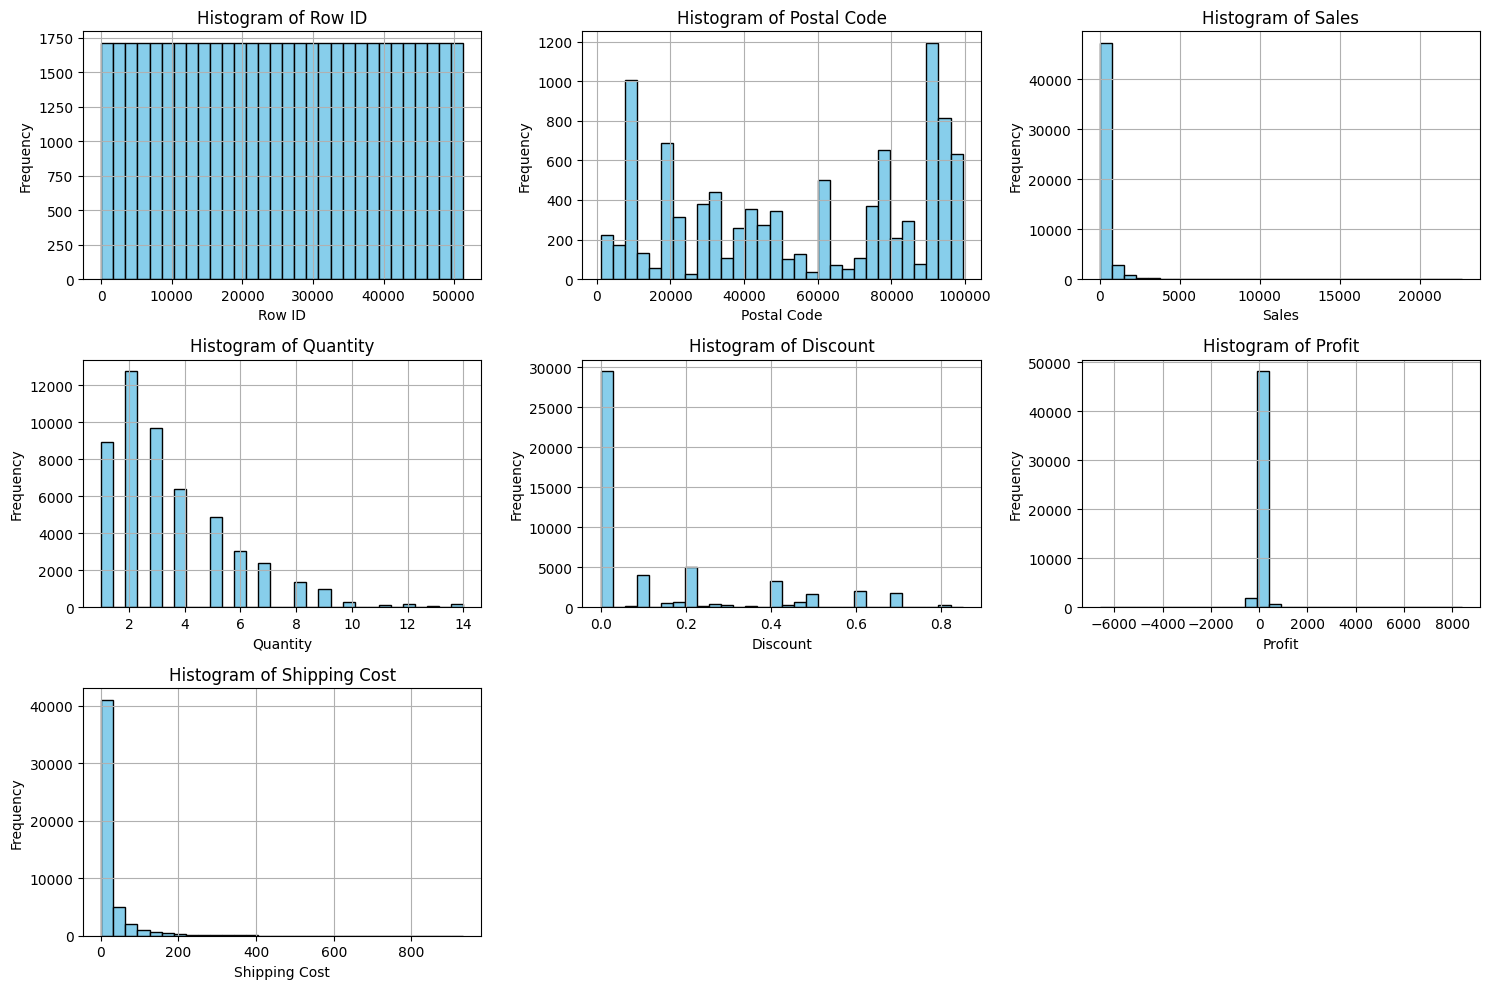

In [15]:
#To show the frequency distribution of the numerical columns
numerical_columns = data.select_dtypes('number').columns

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

***DETECTING THE OUTLIERS***

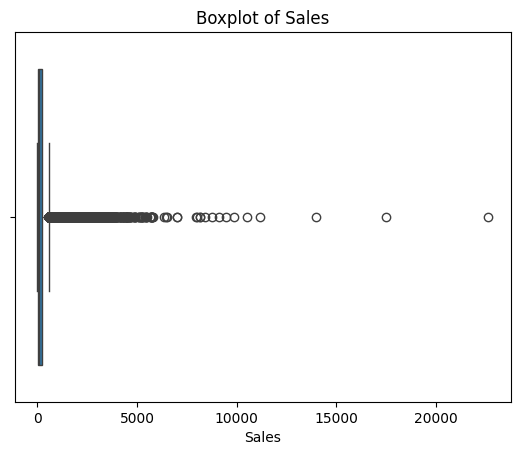

In [16]:
sns.boxplot(x=data['Sales'])

plt.title('Boxplot of Sales')

plt.show()

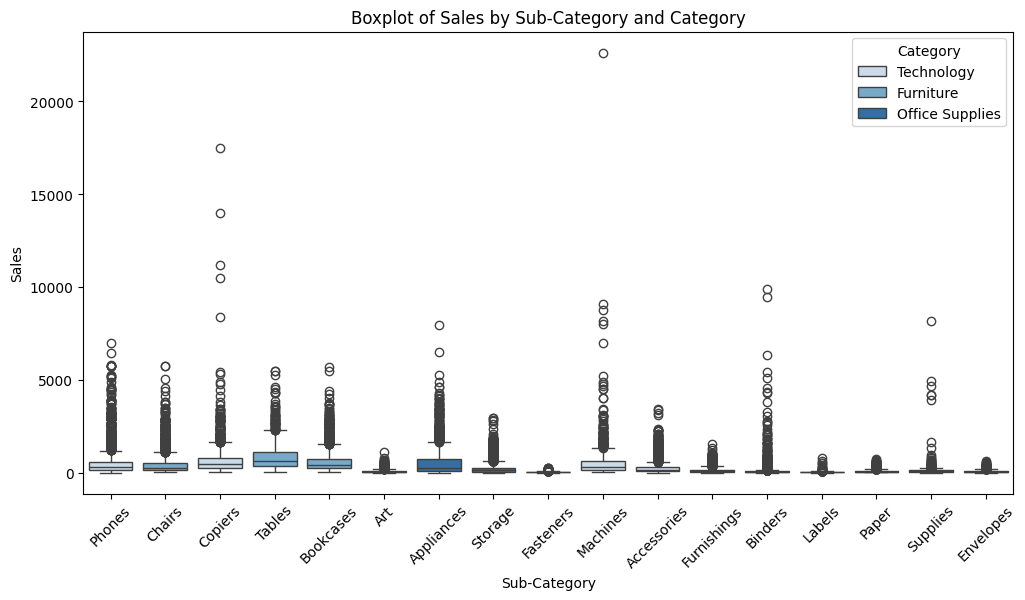

In [17]:
plt.figure(figsize=(12,6))

# Recreate the 'Sub-Category' column from one-hot encoded columns if it doesn't exist
if 'Sub-Category' not in data.columns:
	sub_category_columns = [col for col in data.columns if col.startswith('Sub-Category_')]
	data['Sub-Category'] = data[sub_category_columns].idxmax(axis=1).str.replace('Sub-Category_', '')

# Recreate the 'Category' column from one-hot encoded columns if it doesn't exist
if 'Category' not in data.columns:
	category_columns = [col for col in data.columns if col.startswith('Category_')]
	data['Category'] = data[category_columns].idxmax(axis=1).str.replace('Category_', '')

sns.boxplot(x='Sub-Category', y='Sales', data=data, hue='Category', palette='Blues')

plt.title('Boxplot of Sales by Sub-Category and Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')

plt.xticks(rotation=45)
plt.show()

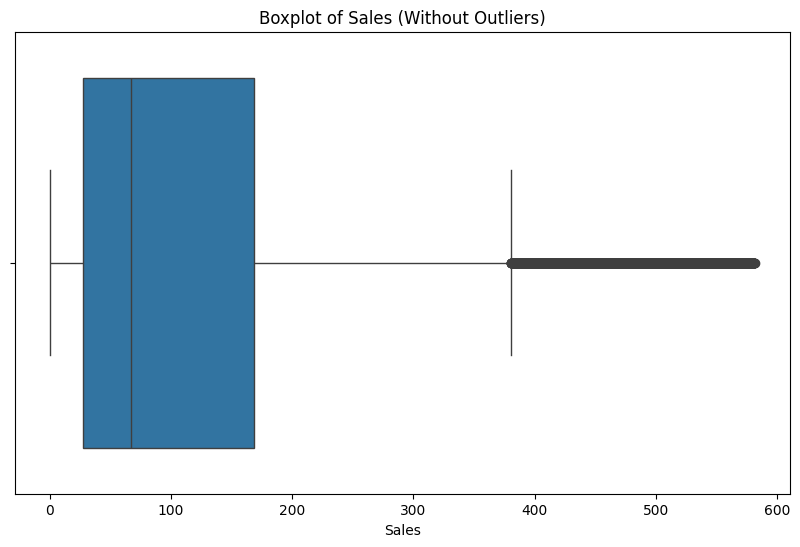

Before Removing Outliers  After Removing Outliers  Difference
Sub-Category                                                               
Accessories                       3075                     2800         275
Appliances                        1742                     1239         503
Art                               4864                     4857           7
Binders                           6146                     6067          79
Bookcases                         2411                     1537         874
Chairs                            3434                     2678         756
Copiers                           2223                     1289         934
Envelopes                         2387                     2386           1
Fasteners                         2601                     2601           0
Furnishings                       3154                     3083          71
Labels                            2601                     2599           2
Machines                          1486                     1078         408
Paper                             3492                     3485           7
Phones                            3357                     2554         803
Storage                           5049                     4586         463
Supplies                          2407                     2392          15
Tables                             861                      404         457

In [18]:
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['Sales'])
plt.title('Boxplot of Sales (Without Outliers)')
plt.show()

sub_category_count_before_outliers = data['Sub-Category'].value_counts()
sub_category_count_after_outliers = filtered_data['Sub-Category'].value_counts()

sub_category_comparison = pd.DataFrame({
    'Before Removing Outliers': sub_category_count_before_outliers,
    'After Removing Outliers': sub_category_count_after_outliers
}).fillna(0)

sub_category_comparison['Difference'] = sub_category_comparison['Before Removing Outliers'] - sub_category_comparison['After Removing Outliers']

sub_category_comparison

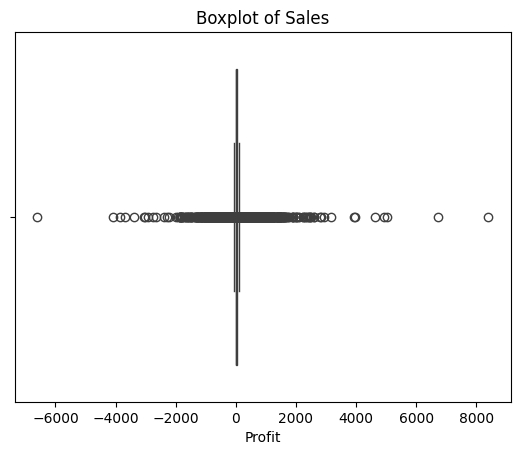

In [19]:
sns.boxplot(x=data['Profit'])

plt.title('Boxplot of Sales')

plt.show()

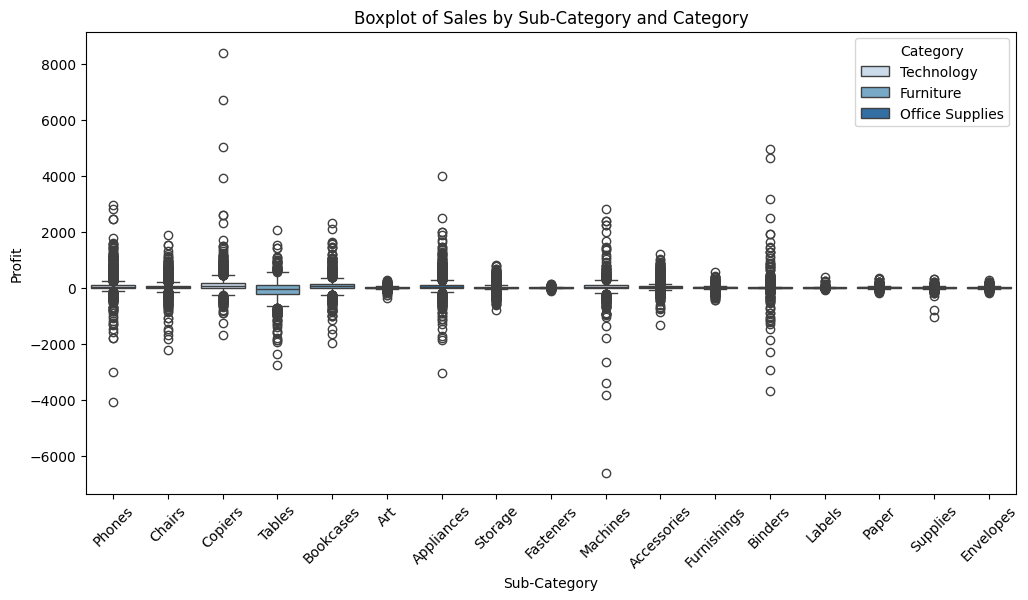

In [20]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Sub-Category', y='Profit', data=data, hue='Category', palette='Blues')

plt.title('Boxplot of Sales by Sub-Category and Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')

plt.xticks(rotation=45)
plt.show()

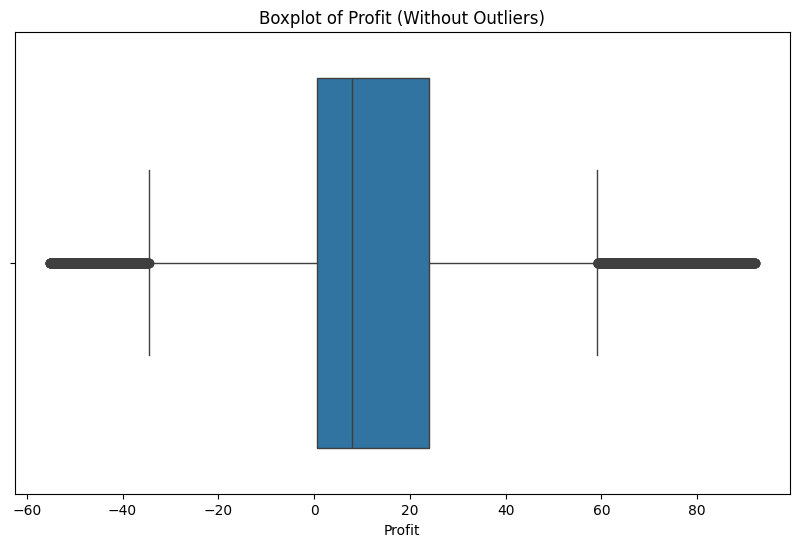

Before Removing Outliers  After Removing Outliers  Difference
Sub-Category                                                               
Accessories                       3075                     2388         687
Appliances                        1742                     1036         706
Art                               4864                     4667         197
Binders                           6146                     5877         269
Bookcases                         2411                     1150        1261
Chairs                            3434                     2285        1149
Copiers                           2223                      969        1254
Envelopes                         2387                     2292          95
Fasteners                         2601                     2595           6
Furnishings                       3154                     2835         319
Labels                            2601                     2590          11
Machines                          1486                      824         662
Paper                             3492                     3347         145
Phones                            3357                     2121        1236
Storage                           5049                     4051         998
Supplies                          2407                     2276         131
Tables                             861                      232         629

In [21]:
Q1 = data['Profit'].quantile(0.25)
Q3 = data['Profit'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['Profit'] >= lower_bound) & (data['Profit'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['Profit'])
plt.title('Boxplot of Profit (Without Outliers)')
plt.show()

sub_category_count_before_outliers = data['Sub-Category'].value_counts()
sub_category_count_after_outliers = filtered_data['Sub-Category'].value_counts()

sub_category_comparison = pd.DataFrame({
    'Before Removing Outliers': sub_category_count_before_outliers,
    'After Removing Outliers': sub_category_count_after_outliers
}).fillna(0)

sub_category_comparison['Difference'] = sub_category_comparison['Before Removing Outliers'] - sub_category_comparison['After Removing Outliers']

sub_category_comparison

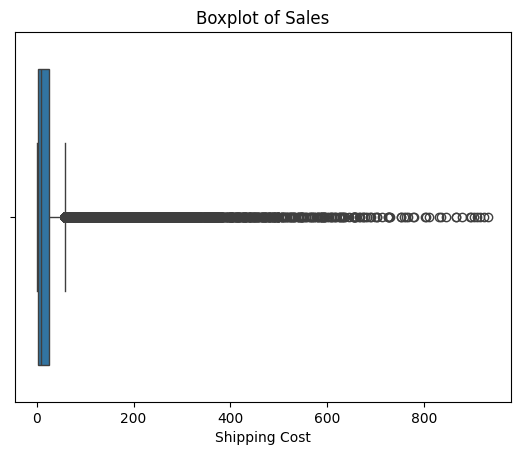

In [22]:
sns.boxplot(x=data['Shipping Cost'])

plt.title('Boxplot of Sales')

plt.show()

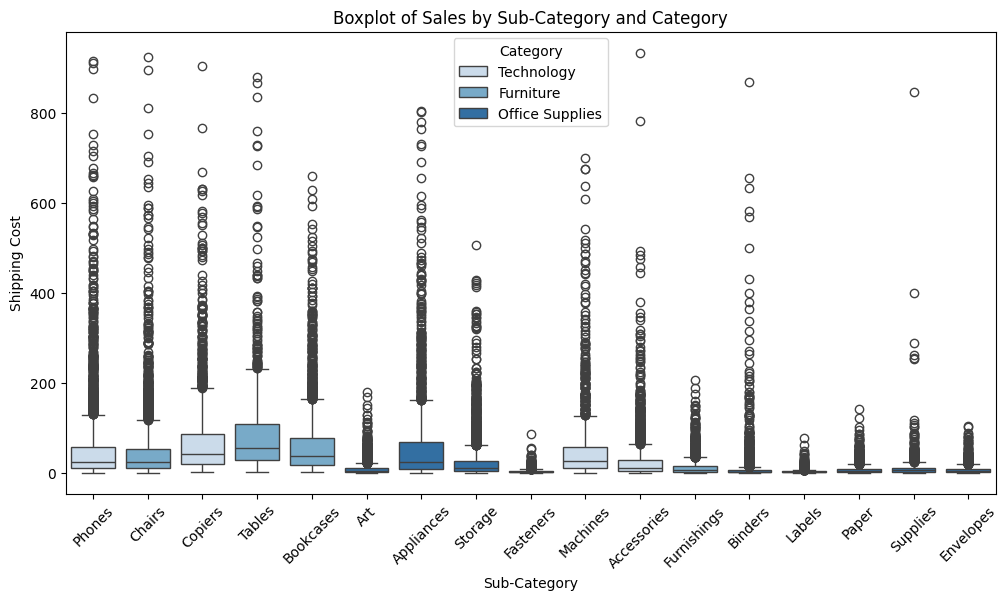

In [23]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Sub-Category', y='Shipping Cost', data=data, hue='Category', palette='Blues')

plt.title('Boxplot of Sales by Sub-Category and Category')
plt.xlabel('Sub-Category')
plt.ylabel('Shipping Cost')

plt.xticks(rotation=45)
plt.show()

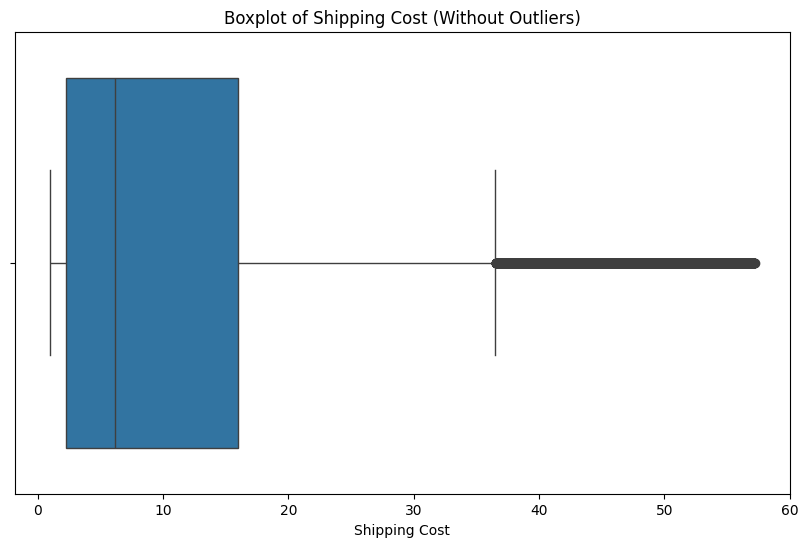

Before Removing Outliers  After Removing Outliers  Difference
Sub-Category                                                               
Accessories                       3075                     2710         365
Appliances                        1742                     1228         514
Art                               4864                     4801          63
Binders                           6146                     6050          96
Bookcases                         2411                     1570         841
Chairs                            3434                     2634         800
Copiers                           2223                     1360         863
Envelopes                         2387                     2369          18
Fasteners                         2601                     2600           1
Furnishings                       3154                     3049         105
Labels                            2601                     2599           2
Machines                          1486                     1112         374
Paper                             3492                     3467          25
Phones                            3357                     2506         851
Storage                           5049                     4504         545
Supplies                          2407                     2380          27
Tables                             861                      442         419

In [24]:
Q1 = data['Shipping Cost'].quantile(0.25)
Q3 = data['Shipping Cost'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['Shipping Cost'] >= lower_bound) & (data['Shipping Cost'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['Shipping Cost'])
plt.title('Boxplot of Shipping Cost (Without Outliers)')
plt.show()

sub_category_count_before_outliers = data['Sub-Category'].value_counts()
sub_category_count_after_outliers = filtered_data['Sub-Category'].value_counts()

sub_category_comparison = pd.DataFrame({
    'Before Removing Outliers': sub_category_count_before_outliers,
    'After Removing Outliers': sub_category_count_after_outliers
}).fillna(0)

sub_category_comparison['Difference'] = sub_category_comparison['Before Removing Outliers'] - sub_category_comparison['After Removing Outliers']

sub_category_comparison

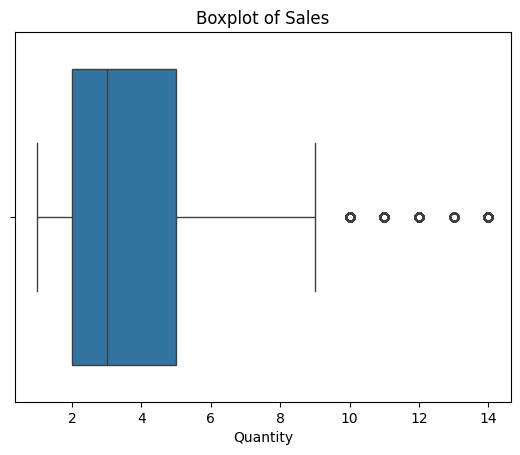

In [25]:
sns.boxplot(x=data['Quantity'])

plt.title('Boxplot of Sales')

plt.show()

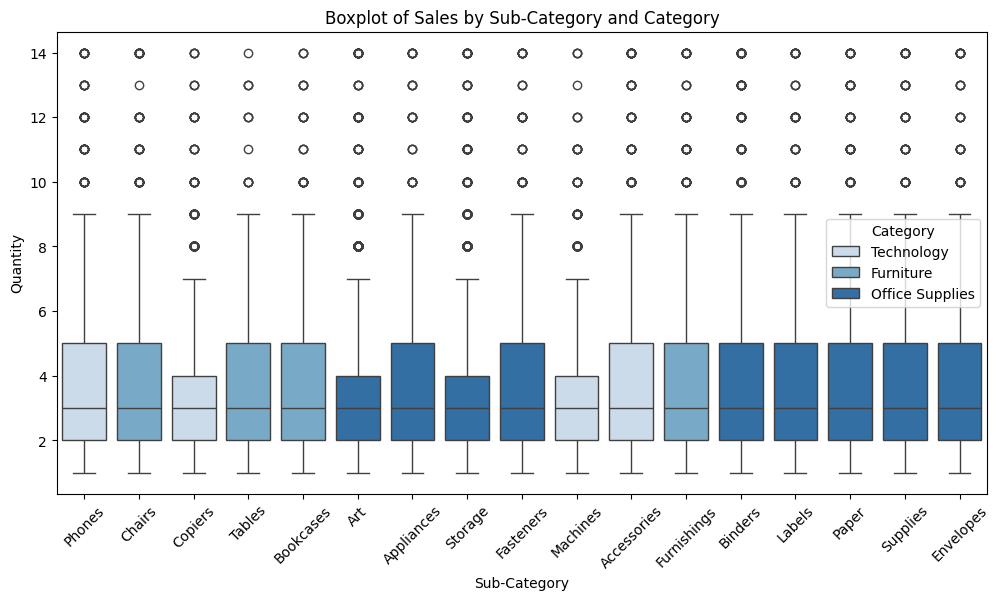

In [26]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Sub-Category', y='Quantity', data=data, hue='Category', palette='Blues')

plt.title('Boxplot of Sales by Sub-Category and Category')
plt.xlabel('Sub-Category')
plt.ylabel('Quantity')

plt.xticks(rotation=45)
plt.show()

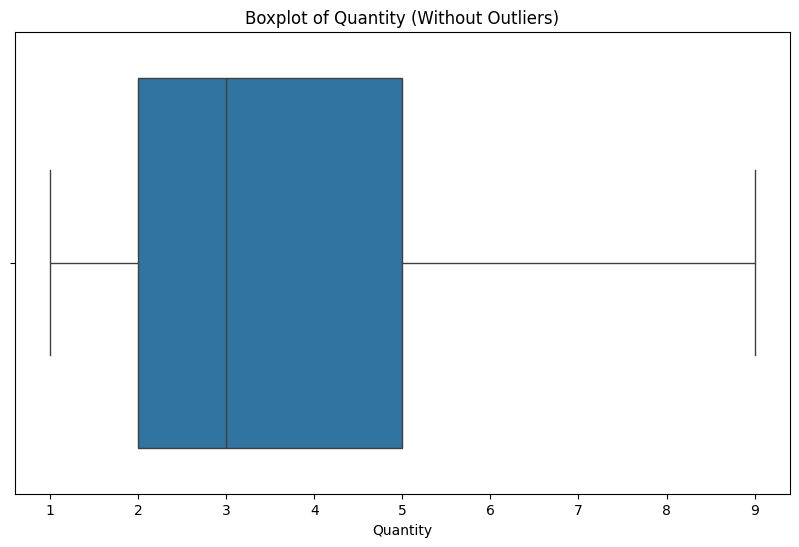

Before Removing Outliers  After Removing Outliers  Difference
Sub-Category                                                               
Binders                           6146                     6022         124
Storage                           5049                     4961          88
Art                               4864                     4787          77
Paper                             3492                     3430          62
Chairs                            3434                     3378          56
Phones                            3357                     3298          59
Furnishings                       3154                     3102          52
Accessories                       3075                     3014          61
Fasteners                         2601                     2559          42
Labels                            2601                     2552          49
Bookcases                         2411                     2382          29
Supplies                          2407                     2360          47
Envelopes                         2387                     2350          37
Copiers                           2223                     2193          30
Appliances                        1742                     1713          29
Machines                          1486                     1464          22
Tables                             861                      848          13

In [27]:
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['Quantity'] >= lower_bound) & (data['Quantity'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['Quantity'])
plt.title('Boxplot of Quantity (Without Outliers)')
plt.show()

sub_category_count_before_outliers = data['Sub-Category'].value_counts()
sub_category_count_after_outliers = filtered_data['Sub-Category'].value_counts()

sub_category_comparison = pd.DataFrame({
    'Before Removing Outliers': sub_category_count_before_outliers,
    'After Removing Outliers': sub_category_count_after_outliers
}).fillna(0)

sub_category_comparison['Difference'] = sub_category_comparison['Before Removing Outliers'] - sub_category_comparison['After Removing Outliers']

sub_category_comparison

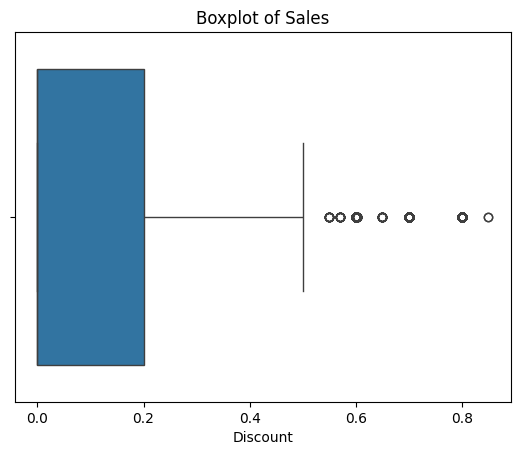

In [28]:
sns.boxplot(x=data['Discount'])

plt.title('Boxplot of Sales')

plt.show()

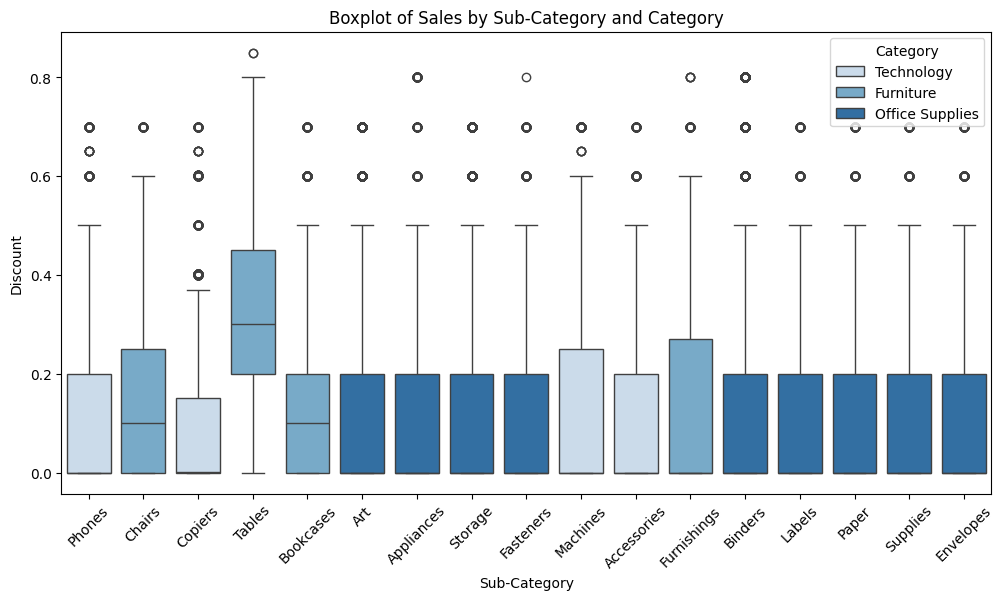

In [29]:
plt.figure(figsize=(12,6))

sns.boxplot(x='Sub-Category', y='Discount', data=data, hue='Category', palette='Blues')

plt.title('Boxplot of Sales by Sub-Category and Category')
plt.xlabel('Sub-Category')
plt.ylabel('Discount')

plt.xticks(rotation=45)
plt.show()

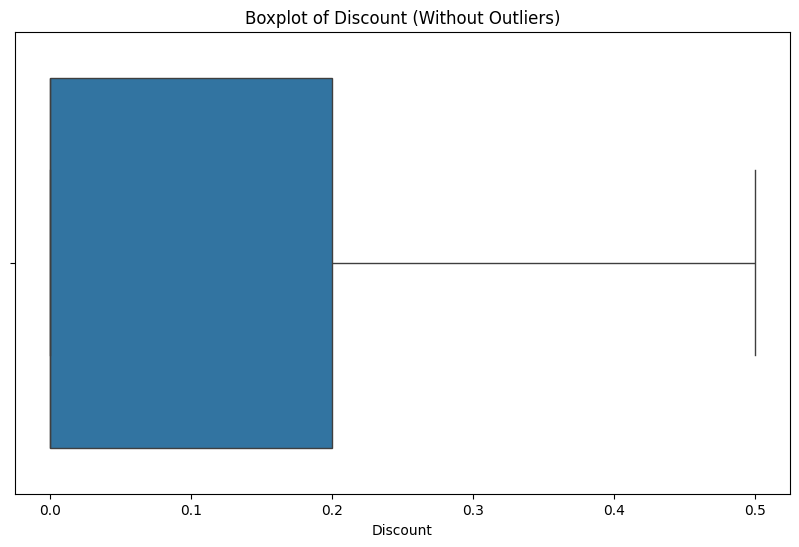

Before Removing Outliers  After Removing Outliers  Difference
Sub-Category                                                               
Accessories                       3075                     2932         143
Appliances                        1742                     1573         169
Art                               4864                     4451         413
Binders                           6146                     5117        1029
Bookcases                         2411                     2224         187
Chairs                            3434                     3213         221
Copiers                           2223                     2099         124
Envelopes                         2387                     2238         149
Fasteners                         2601                     2441         160
Furnishings                       3154                     2854         300
Labels                            2601                     2471         130
Machines                          1486                     1295         191
Paper                             3492                     3358         134
Phones                            3357                     3155         202
Storage                           5049                     4685         364
Supplies                          2407                     2273         134
Tables                             861                      739         122

In [30]:
Q1 = data['Discount'].quantile(0.25)
Q3 = data['Discount'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['Discount'] >= lower_bound) & (data['Discount'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['Discount'])
plt.title('Boxplot of Discount (Without Outliers)')
plt.show()

sub_category_count_before_outliers = data['Sub-Category'].value_counts()
sub_category_count_after_outliers = filtered_data['Sub-Category'].value_counts()

sub_category_comparison = pd.DataFrame({
    'Before Removing Outliers': sub_category_count_before_outliers,
    'After Removing Outliers': sub_category_count_after_outliers
}).fillna(0)

sub_category_comparison['Difference'] = sub_category_comparison['Before Removing Outliers'] - sub_category_comparison['After Removing Outliers']

sub_category_comparison

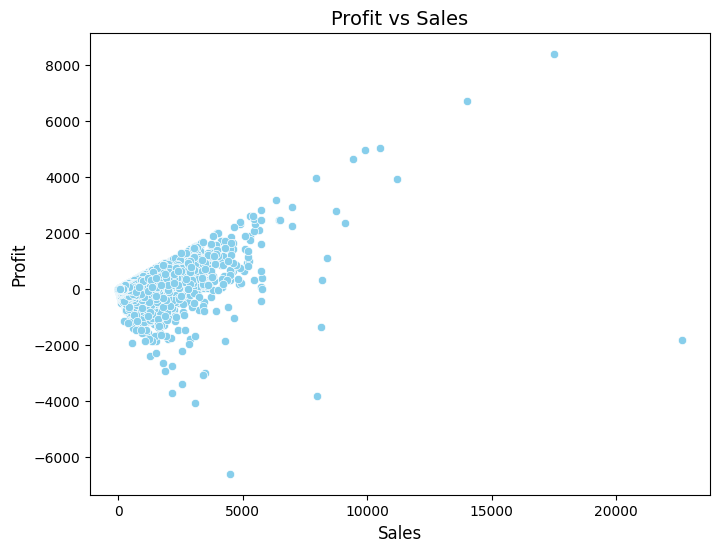

In [31]:
plt.figure(figsize=(8,6))

sns.scatterplot(x='Sales', y='Profit', data=data, color='skyblue')

plt.title('Profit vs Sales', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)

plt.show()

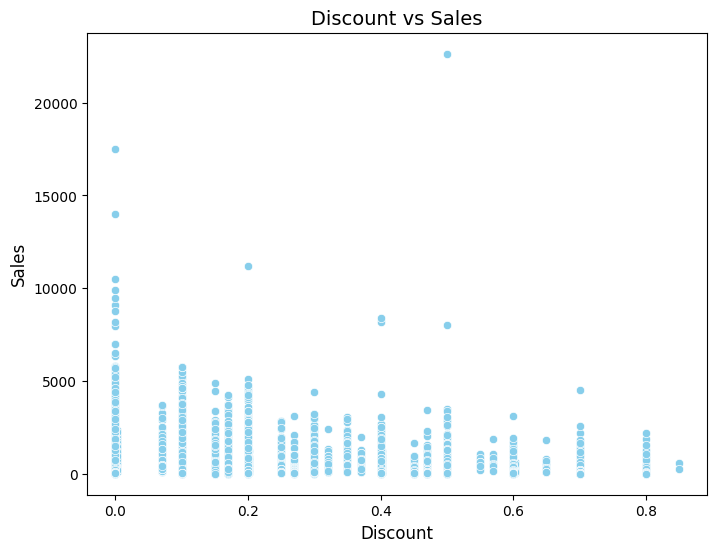

In [32]:
plt.figure(figsize=(8,6))

sns.scatterplot(x='Discount', y='Sales', data=data, color='skyblue')

plt.title('Discount vs Sales', fontsize=14)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.show()

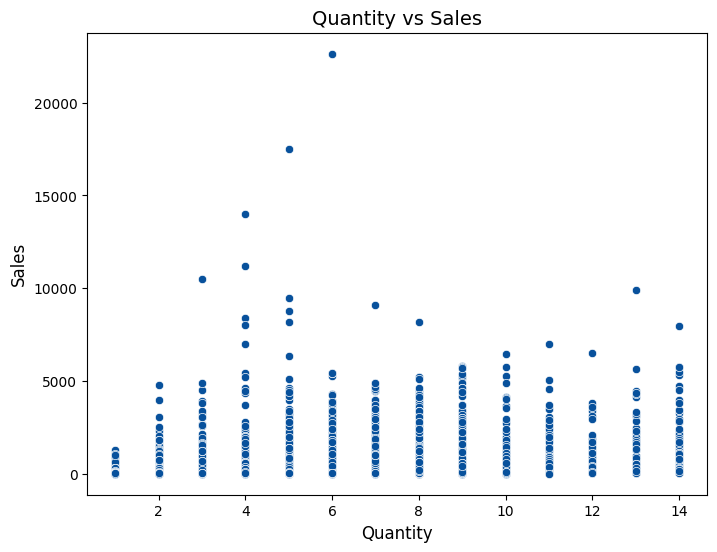

In [33]:
plt.figure(figsize=(8,6))

sns.scatterplot(x='Quantity', y='Sales', data=data, color='#08519c')

plt.title('Quantity vs Sales', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.show()

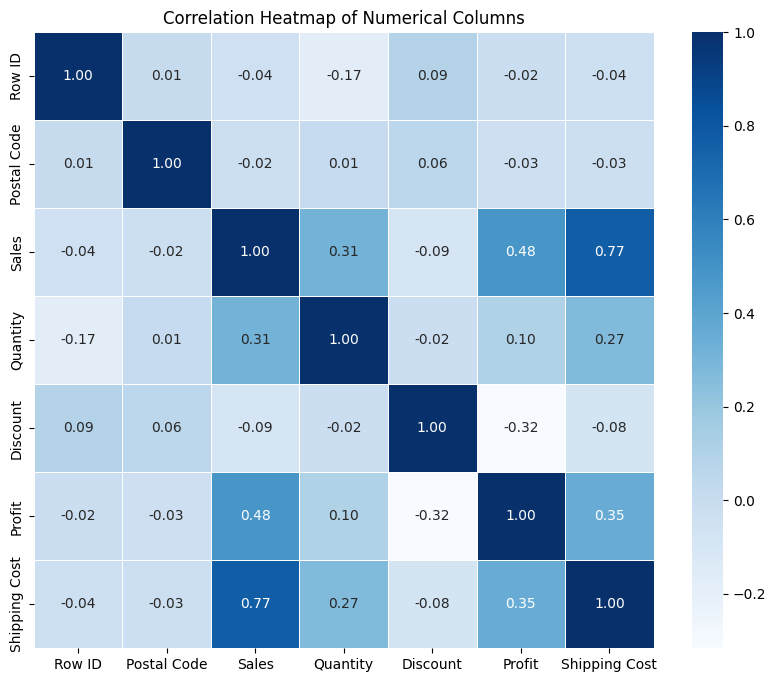

In [34]:
#To draw a Correlation Heatmap between numerical columns
corr_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

***To analyze the Categorical Columns***

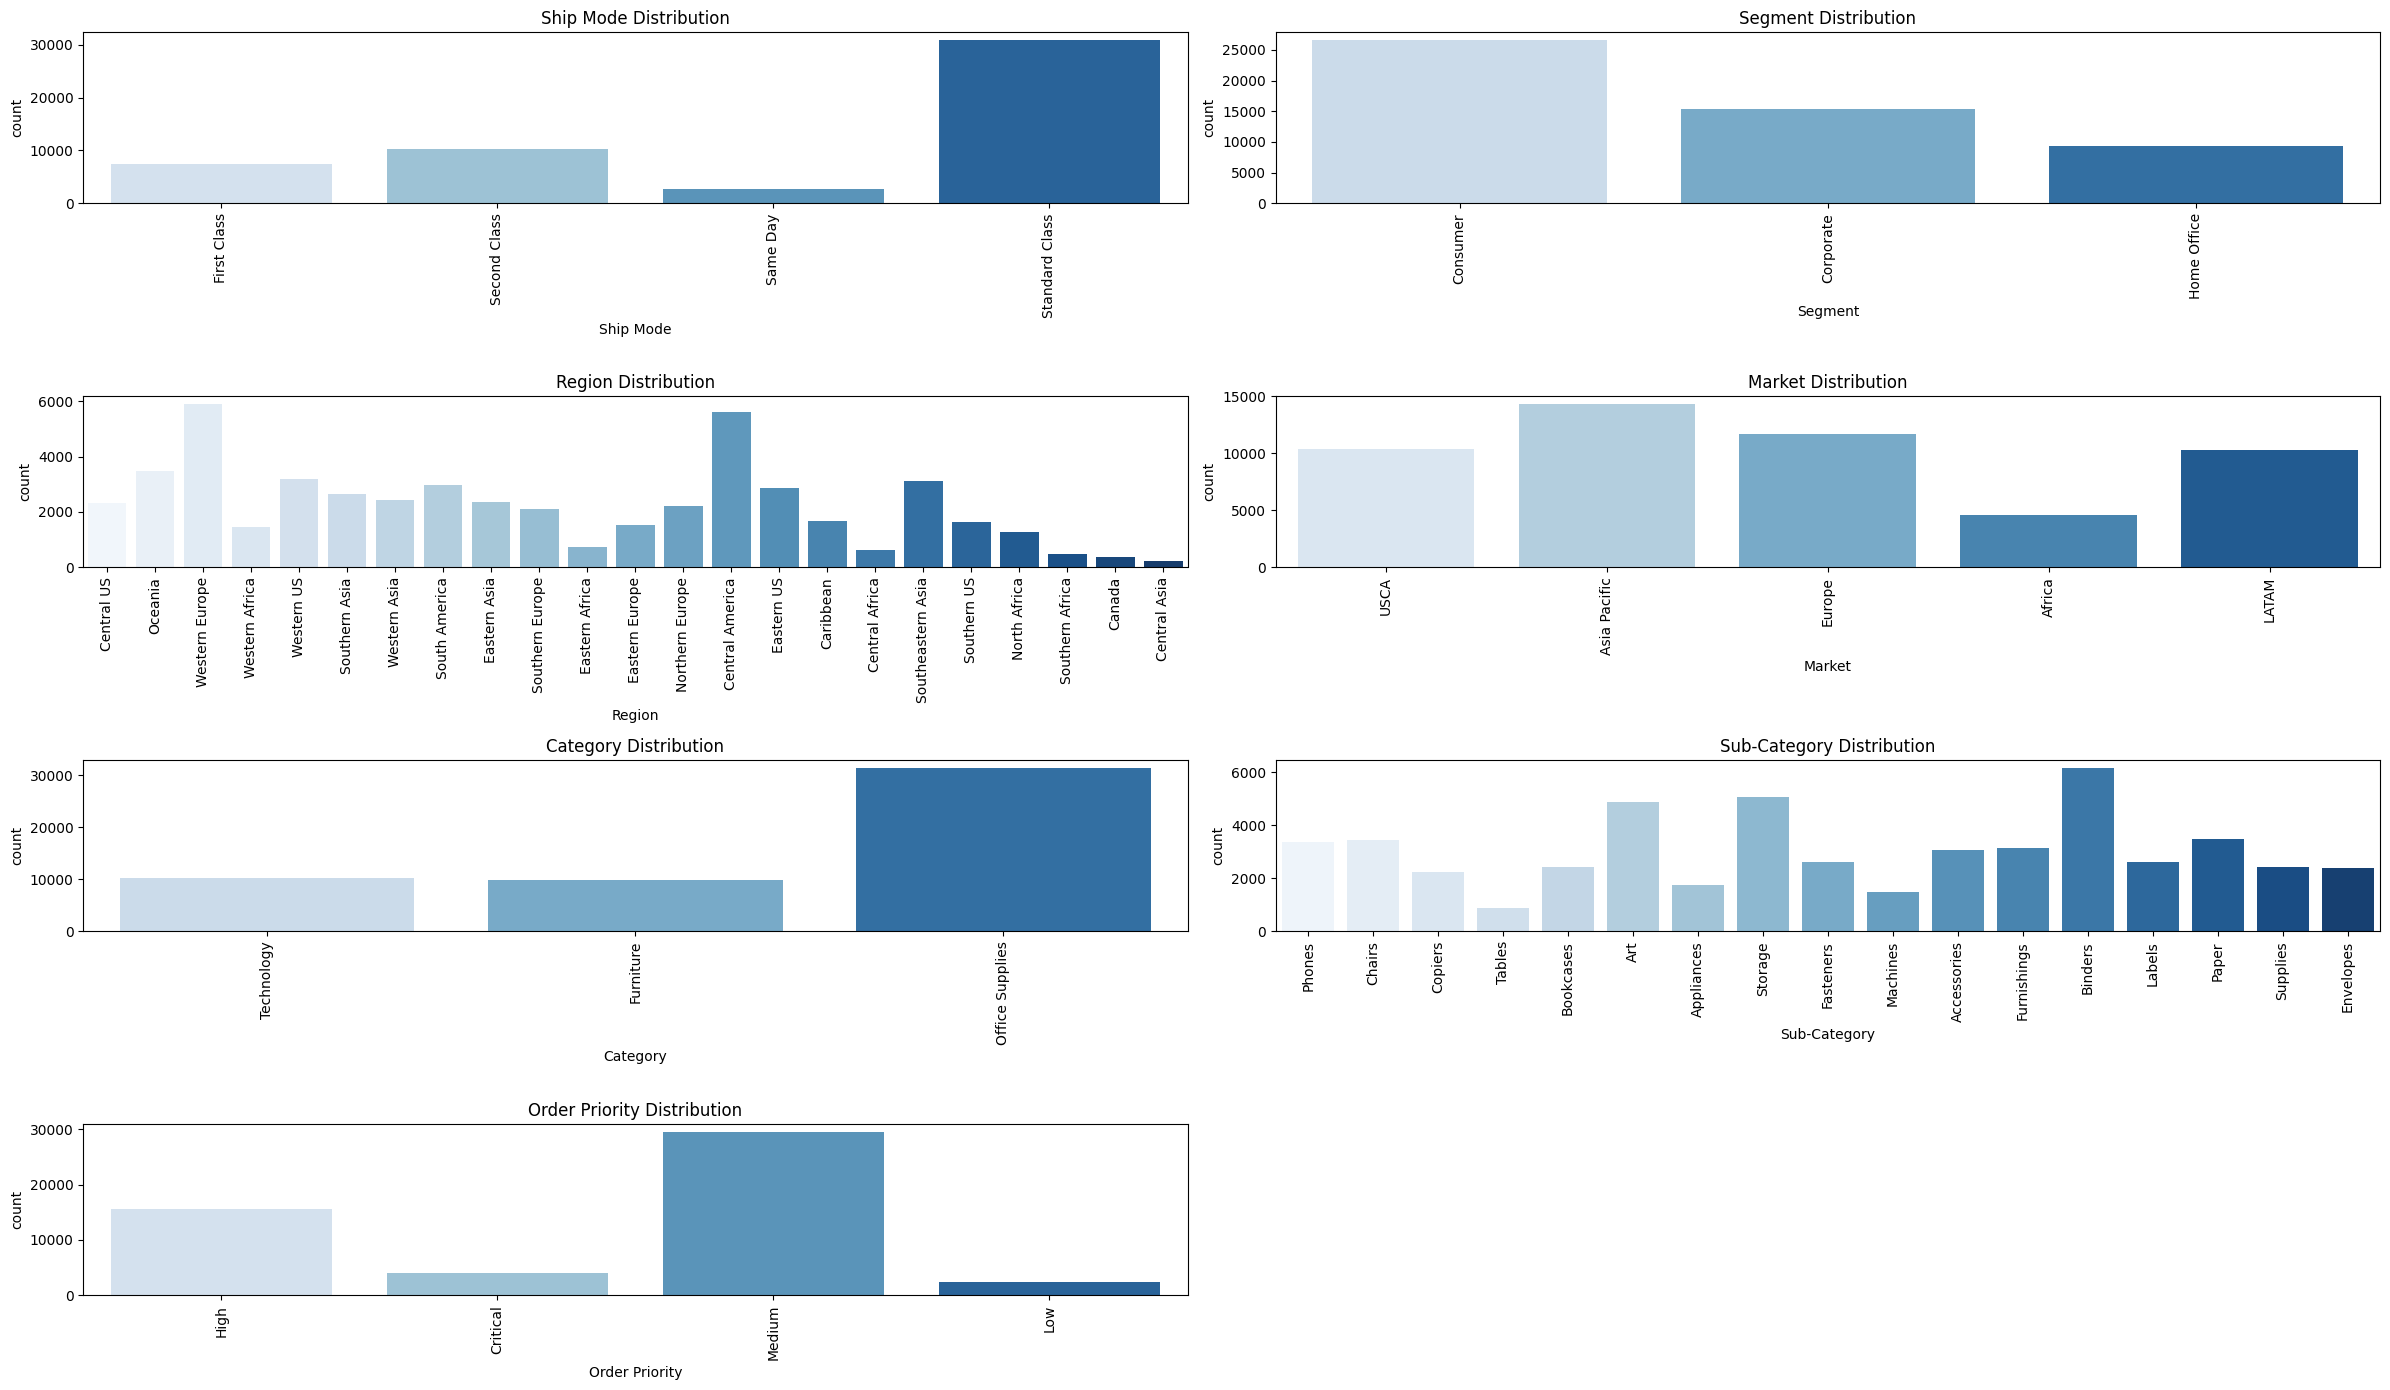

In [35]:
#To show the frequency distribution of the categorical columns
categorical_columns = ['Ship Mode', 'Segment', 'Region', 'Market', 'Category', 'Sub-Category', 'Order Priority']

plt.figure(figsize=(24, 14))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=column, data=data, palette='Blues')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

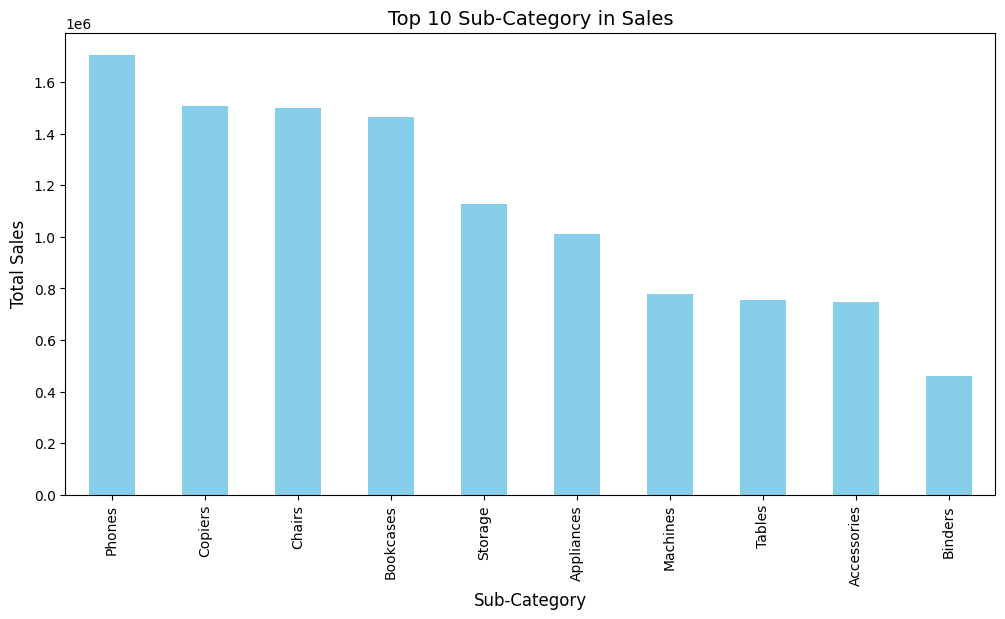

Sub-Category
Phones         1706824.14
Copiers        1509436.27
Chairs         1501681.76
Bookcases      1466572.24
Storage        1126812.97
Appliances     1010535.52
Machines        779060.07
Tables          757041.92
Accessories     749237.02
Binders         461869.39
Name: Sales, dtype: float64

In [36]:
#the top 10 Sub-Category by sales
top_products = round (data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False), 2)

top_10_products = top_products.head(10)

plt.figure(figsize=(12,6))
top_10_products.plot(kind='bar', color='skyblue')

plt.title('Top 10 Sub-Category in Sales', fontsize=14)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)

plt.show()

top_10_products

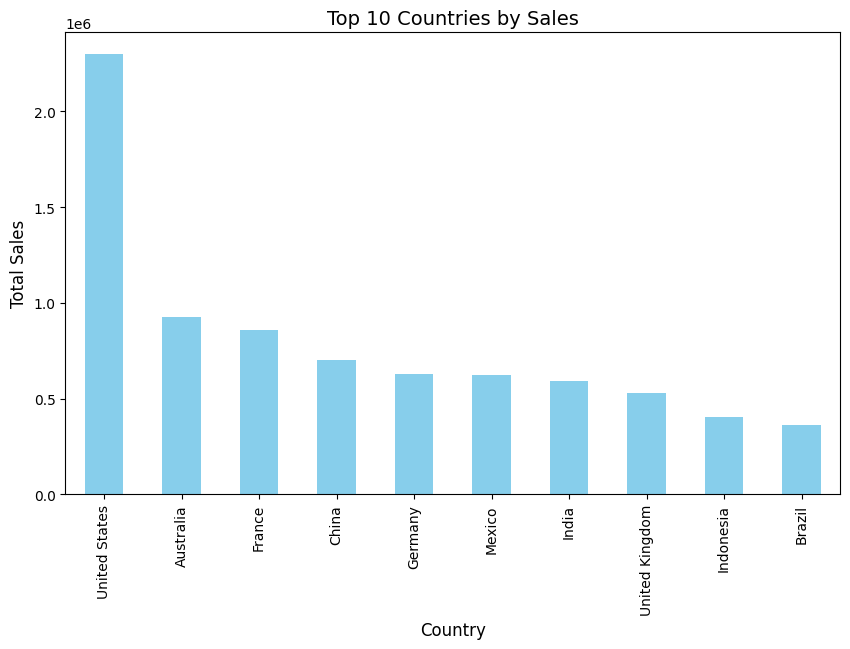

Country
United States     2297200.86
Australia          925235.85
France             858931.08
China              700562.02
Germany            628136.19
Mexico             621552.65
India              589486.04
United Kingdom     528576.30
Indonesia          404887.50
Brazil             359924.86
Name: Sales, dtype: float64

In [37]:
#the top 10 countries by sales
country_sales = round(data.groupby('Country')['Sales'].sum(), 2)

top_10_countries = country_sales.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_10_countries.plot(kind='bar', color='skyblue')

plt.title('Top 10 Countries by Sales', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)


plt.show()

top_10_countries

***To analyze the relationship between time and sales***

In [38]:
order_dates = pd.to_datetime(data['Order Date'])

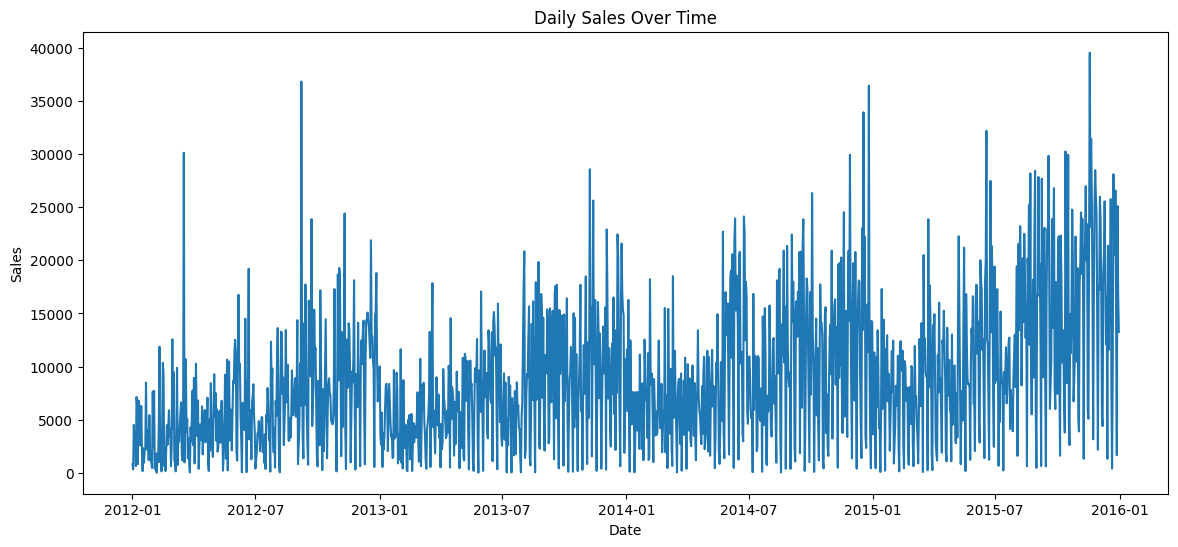

In [39]:
daily_sales = data.groupby(order_dates)['Sales'].sum()

plt.figure(figsize=(14,6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

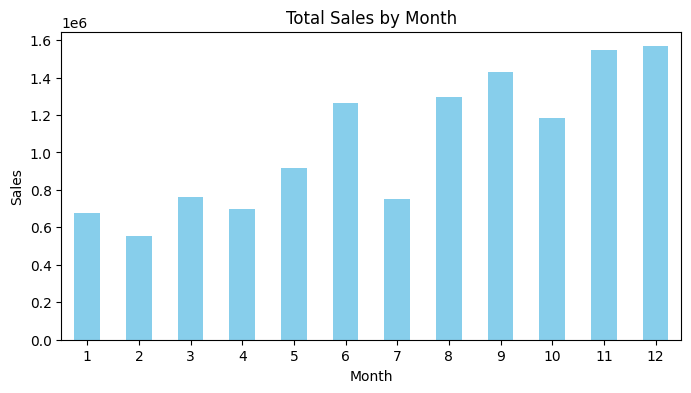

In [40]:
monthly_sales = data.groupby(order_dates.dt.month)['Sales'].sum()

plt.figure(figsize=(8,4))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

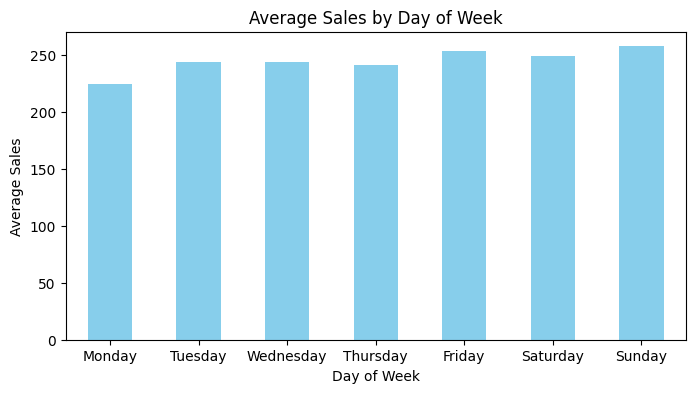

In [41]:
dow_sales = data.groupby(order_dates.dt.dayofweek)['Sales'].mean()

dow_sales.index = dow_sales.index.map({ 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

plt.figure(figsize=(8,4))
dow_sales.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

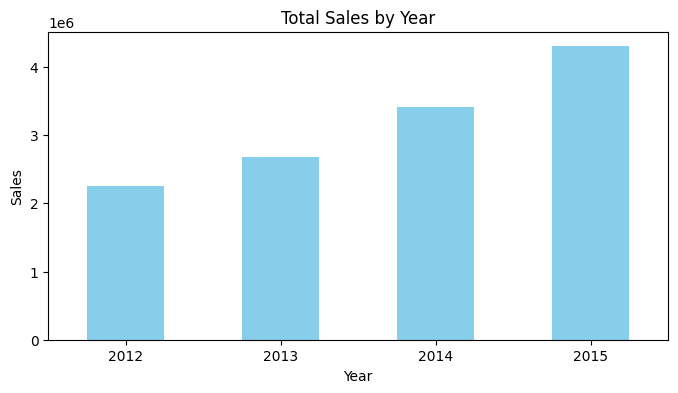

In [42]:
yearly_sales = data.groupby(order_dates.dt.year)['Sales'].sum()

plt.figure(figsize=(8,4))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

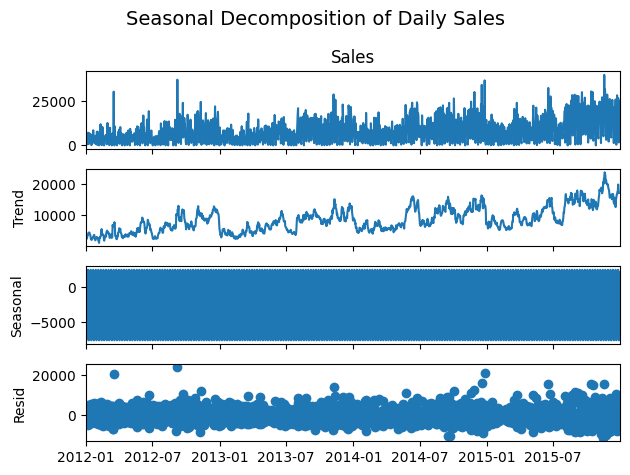

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_sales = data.groupby(order_dates)['Sales'].sum().asfreq('D').fillna(0)

decomposition = seasonal_decompose(daily_sales, model='additive')
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Daily Sales", fontsize=14)
plt.tight_layout()
plt.show()

# **Data Cleaning**

We copy the data to preserve the original dataset in case we need to refer back to it or fix mistakes.

**deep = True -->** To create a completely independent copy of the dataframe. The changes in the copied DataFrame do not affect the original.



In [44]:
df = data.copy(deep=True)

In [45]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Day'] = df['Ship Date'].dt.day
df['Order Day of Week'] = df['Order Date'].dt.dayofweek
df['Ship Day of Week'] = df['Ship Date'].dt.dayofweek
df['Order Week of Year'] = df['Order Date'].dt.isocalendar().week
df['Ship Week of Year'] = df['Ship Date'].dt.isocalendar().week
df['Order Quarter'] = df['Order Date'].dt.quarter
df['Ship Quarter'] = df['Ship Date'].dt.quarter
df['Order Month Name'] = df['Order Date'].dt.month_name()
df['Ship Month Name'] = df['Ship Date'].dt.month_name()
df['Order Year Month'] = df['Order Date'].dt.to_period('M')
df['Ship Year Month'] = df['Ship Date'].dt.to_period('M')
df['Order Year Month'] = df['Order Year Month'].astype(str)

In [46]:
df.head()

Row ID                  Order ID Order Date  Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

             State        Country          Region        Market   Product ID  \
0         Oklahoma  United States      Central US          USCA  TEC-PH-5816   
1  New South Wales      Australia         Oceania  Asia Pacific  FUR-CH-5379   
2       Queensland      Australia         Oceania  Asia Pacific  TEC-PH-5356   
3           Berlin        Germany  Western Europe        Europe  TEC-PH-5267   
4            Dakar        Senegal  Western Africa        Africa  TEC-CO-6011   

     Category Sub-Category                               Product Name  \
0  Technology       Phones                           Samsung Convoy 3   
1   Furniture       Chairs  Novimex Executive Leather Armchair, Black   
2  Technology       Phones          Nokia Smart Phone, with Caller ID   
3  Technology       Phones             Motorola Smart Phone, Cordless   
4  Technology      Copiers             Sharp Wireless Fax, High-Speed   

      Sales  Quantity  Discount    Profit  Shipping Cost Order Priority  \
0   221.980         2       0.0   62.1544          40.77           High   
1  3709.395         9       0.1 -288.7650         923.63       Critical   
2  5175.171         9       0.1  919.9710         915.49         Medium   
3  2892.510         5       0.1  -96.5400         910.16         Medium   
4  2832.960         8       0.0  311.5200         903.04       Critical   

   Order Year  Order Month  Order Day  Ship Year  Ship Month  Ship Day  \
0        2014           11         11       2014          11        13   
1        2014            2          5       2014           2         7   
2        2014           10         17       2014          10        18   
3        2014            1         28       2014           1        30   
4        2014           11          5       2014          11         6   

   Order Day of Week  Ship Day of Week  Order Week of Year  Ship Week of Year  \
0                  1                 3                  46                 46   
1                  2                 4                   6                  6   
2                  4                 5                  42                 42   
3                  1                 3                   5                  5   
4                  2                 3                  45                 45   

   Order Quarter  Ship Quarter Order Month Name Ship Month Name  \
0              4             4         November        November   
1              1             1         February        February   
2              4             4          October         October   
3              1             1          January         January   
4              4             4         November        November   

  Order Year Month Ship Year Month  
0          2014-11         2014-11  
1          2014-02         2014-02  
2          2014-10         2014-10  
3          2014-01         2014-01  
4          2014-11         2014-11

# Set the Order Date as the index
# To extract Time Features

In [47]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


df.set_index('Order Date', inplace=True)

df.sort_index(inplace=True)

In [48]:
monthly_sales = df['Sales'].resample('m').sum()

print(monthly_sales.head())

Order Date
2012-01-31     98898.48886
2012-02-29    103717.92328
2012-03-31    135746.40206
2012-04-30    114332.96318
2012-05-31    158228.32880
Freq: ME, Name: Sales, dtype: float64


# Removing unimportant columns

In [49]:
# columns_to_drop
df.drop(columns=['Row ID', 'Customer Name', 'Product Name', 'Postal Code','Product ID','Order ID','Customer ID'], inplace=True)

In [50]:
df.columns

Index(['Ship Date', 'Ship Mode', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Year',
       'Order Month', 'Order Day', 'Ship Year', 'Ship Month', 'Ship Day',
       'Order Day of Week', 'Ship Day of Week', 'Order Week of Year',
       'Ship Week of Year', 'Order Quarter', 'Ship Quarter',
       'Order Month Name', 'Ship Month Name', 'Order Year Month',
       'Ship Year Month'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51290 entries, 2012-01-01 to 2015-12-31
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ship Date           51290 non-null  datetime64[ns]
 1   Ship Mode           51290 non-null  object        
 2   Segment             51290 non-null  object        
 3   City                51290 non-null  object        
 4   State               51290 non-null  object        
 5   Country             51290 non-null  object        
 6   Region              51290 non-null  object        
 7   Market              51290 non-null  object        
 8   Category            51290 non-null  object        
 9   Sub-Category        51290 non-null  object        
 10  Sales               51290 non-null  float64       
 11  Quantity            51290 non-null  int64         
 12  Discount            51290 non-null  float64       
 13  Profit              51290 non

# Create the Order Season column

In [52]:
def get_season(date):
    winter_start = pd.Timestamp(date.year, 12, 1)
    winter_end = pd.Timestamp(date.year + 1, 3, 30)
    spring_start = pd.Timestamp(date.year, 3, 31)
    spring_end = pd.Timestamp(date.year, 6, 30)
    summer_start = pd.Timestamp(date.year, 7, 1)
    summer_end = pd.Timestamp(date.year, 9, 30)

    if winter_start <= date <= winter_end:
        return 'Winter'
    elif spring_start <= date <= spring_end:
        return 'Spring'
    elif summer_start <= date <= summer_end:
        return 'Summer'
    else:
        return 'Fall'

df['Order_Season'] = df.index.to_series().apply(get_season)

***Mark promotional periods (e.g., Black Friday, Year-End), as many people shop during these times of the year.***

In [53]:
df['Is_Black_Friday'] = df.index.to_series().apply(lambda x: 1 if (x.month == 11 and x.day >= 23) else 0)

In [54]:
df[df["Is_Black_Friday"]==1]

Ship Date       Ship Mode      Segment            City  \
Order Date                                                           
2012-11-23 2012-11-28    Second Class     Consumer        Cárdenas   
2012-11-23 2012-11-23        Same Day    Corporate        Columbus   
2012-11-23 2012-11-23        Same Day    Corporate        Columbus   
2012-11-23 2012-11-28  Standard Class  Home Office  Virginia Beach   
2012-11-23 2012-11-25    Second Class     Consumer     Mexico City   
...               ...             ...          ...             ...   
2015-11-30 2015-12-05  Standard Class     Consumer          Anqing   
2015-11-30 2015-12-04  Standard Class     Consumer     Chattanooga   
2015-11-30 2015-12-04  Standard Class    Corporate       Darbhanga   
2015-11-30 2015-12-04  Standard Class     Consumer     Chattanooga   
2015-11-30 2015-12-05    Second Class     Consumer       Carrefour   

                       State        Country           Region        Market  \
Order Date                                                                   
2012-11-23          Matanzas           Cuba        Caribbean         LATAM   
2012-11-23              Ohio  United States       Eastern US          USCA   
2012-11-23              Ohio  United States       Eastern US          USCA   
2012-11-23          Virginia  United States      Southern US          USCA   
2012-11-23  Distrito Federal         Mexico  Central America         LATAM   
...                      ...            ...              ...           ...   
2015-11-30             Anhui          China     Eastern Asia  Asia Pacific   
2015-11-30         Tennessee  United States      Southern US          USCA   
2015-11-30             Bihar          India    Southern Asia  Asia Pacific   
2015-11-30         Tennessee  United States      Southern US          USCA   
2015-11-30             Ouest          Haiti        Caribbean         LATAM   

                   Category Sub-Category     Sales  Quantity  Discount  \
Order Date                                                               
2012-11-23  Office Supplies      Storage    34.020         3       0.0   
2012-11-23        Furniture       Chairs   611.058         3       0.3   
2012-11-23       Technology       Phones  1049.970         5       0.4   
2012-11-23        Furniture  Furnishings   111.150         5       0.0   
2012-11-23       Technology       Phones   339.360         3       0.0   
...                     ...          ...       ...       ...       ...   
2015-11-30  Office Supplies    Fasteners    27.420         2       0.0   
2015-11-30        Furniture       Chairs   390.368         2       0.2   
2015-11-30  Office Supplies      Storage   642.000         5       0.0   
2015-11-30        Furniture  Furnishings   101.520         5       0.2   
2015-11-30        Furniture       Chairs   263.136         4       0.4   

              Profit  Shipping Cost Order Priority  Order Year  Order Month  \
Order Date                                                                    
2012-11-23    6.1200          2.082         Medium        2012           11   
2012-11-23  -34.9176         97.760           High        2012           11   
2012-11-23 -209.9940        134.640           High        2012           11   
2012-11-23   48.9060          6.610         Medium        2012           11   
2012-11-23  152.7000         44.688           High        2012           11   
...              ...            ...            ...         ...          ...   
2015-11-30    3.5400          1.350         Medium        2015           11   
2015-11-30   48.7960         26.160         Medium        2015           11   
2015-11-30  179.7000         59.030         Medium        2015           11   
2015-11-30   19.0350          6.740         Medium        2015           11   
2015-11-30  -17.5840         43.713           High        2015           11   

            Order Day  Ship Year  Ship Month  Ship Day  Order Day of Week  \
Order Date        

Adding a new columns Day of week ,is weekend

In [55]:
df['day_of_week'] = df.index.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [56]:
df

Ship Date       Ship Mode      Segment           City  \
Order Date                                                          
2012-01-01 2012-01-08  Standard Class     Consumer    Wagga Wagga   
2012-01-01 2012-01-08  Standard Class     Consumer    Wagga Wagga   
2012-01-01 2012-01-05    Second Class     Consumer       Budapest   
2012-01-01 2012-01-08  Standard Class     Consumer    Wagga Wagga   
2012-01-01 2012-01-05    Second Class  Home Office      Stockholm   
...               ...             ...          ...            ...   
2015-12-31 2016-01-04  Standard Class     Consumer      Bielefeld   
2015-12-31 2016-01-04  Standard Class     Consumer  New York City   
2015-12-31 2016-01-02    Second Class    Corporate        Durango   
2015-12-31 2016-01-04  Standard Class    Corporate         Manila   
2015-12-31 2015-12-31        Same Day  Home Office        Managua   

                             State        Country             Region  \
Order Date                                                             
2012-01-01         New South Wales      Australia            Oceania   
2012-01-01         New South Wales      Australia            Oceania   
2012-01-01                Budapest        Hungary     Eastern Europe   
2012-01-01         New South Wales      Australia            Oceania   
2012-01-01               Stockholm         Sweden    Northern Europe   
...                            ...            ...                ...   
2015-12-31  North Rhine-Westphalia        Germany     Western Europe   
2015-12-31                New York  United States         Eastern US   
2015-12-31                 Durango         Mexico    Central America   
2015-12-31        National Capital    Philippines  Southeastern Asia   
2015-12-31                 Managua      Nicaragua    Central America   

                  Market         Category Sub-Category    Sales  Quantity  \
Order Date                                                                  
2012-01-01  Asia Pacific  Office Supplies     Supplies  120.366         3   
2012-01-01  Asia Pacific  Office Supplies        Paper   55.242         2   
2012-01-01        Europe  Office Supplies      Storage   66.120         4   
2012-01-01  Asia Pacific        Furniture  Furnishings  113.670         5   
2012-01-01        Europe  Office Supplies        Paper   44.865         3   
...                  ...              ...          ...      ...       ...   
2015-12-31        Europe  Office Supplies     Supplies  260.820         6   
2015-12-31          USCA        Furniture    Bookcases  323.136         4   
2015-12-31         LATAM  Office Supplies       Labels   22.260         3   
2015-12-31  Asia Pacific       Technology      Copiers  684.606         4   
2015-12-31         LATAM  Office Supplies      Storage   15.000         2   

            Discount   Profit  Shipping Cost Order Priority  Order Year  \
Order Date                                                                
2012-01-01      0.10  36.0360          9.720         Medium        2012   
2012-01-01      0.10  15.3420          1.800         Medium        2012   
2012-01-01      0.00  29.6400          8.170           High        2012   
2012-01-01      0.10  37.7700          4.700         Medium        2012   
2012-01-01      0.50 -26.0550          4.820           High        2012   
...              ...      ...            ...            ...         ...   
2015-12-31      0.00  12.9600         15.790           High        2015   
2015-12-31      0.20  12.1176         38.270           High        2015   
2015-12-31      0.00   3.9600          2.274           High        2015   
2015-12-31      0.35 -63.2340         42.920         Medium        2015   
2015-12-31      0.00   1.2000          2.338       Critical        2015   

            Order Month  Order Day  Ship Year  Ship Month  Ship Day  \
Order Date                                                            
2012-01-01            1          1       2012           1

***To remove the OUTLIERs***

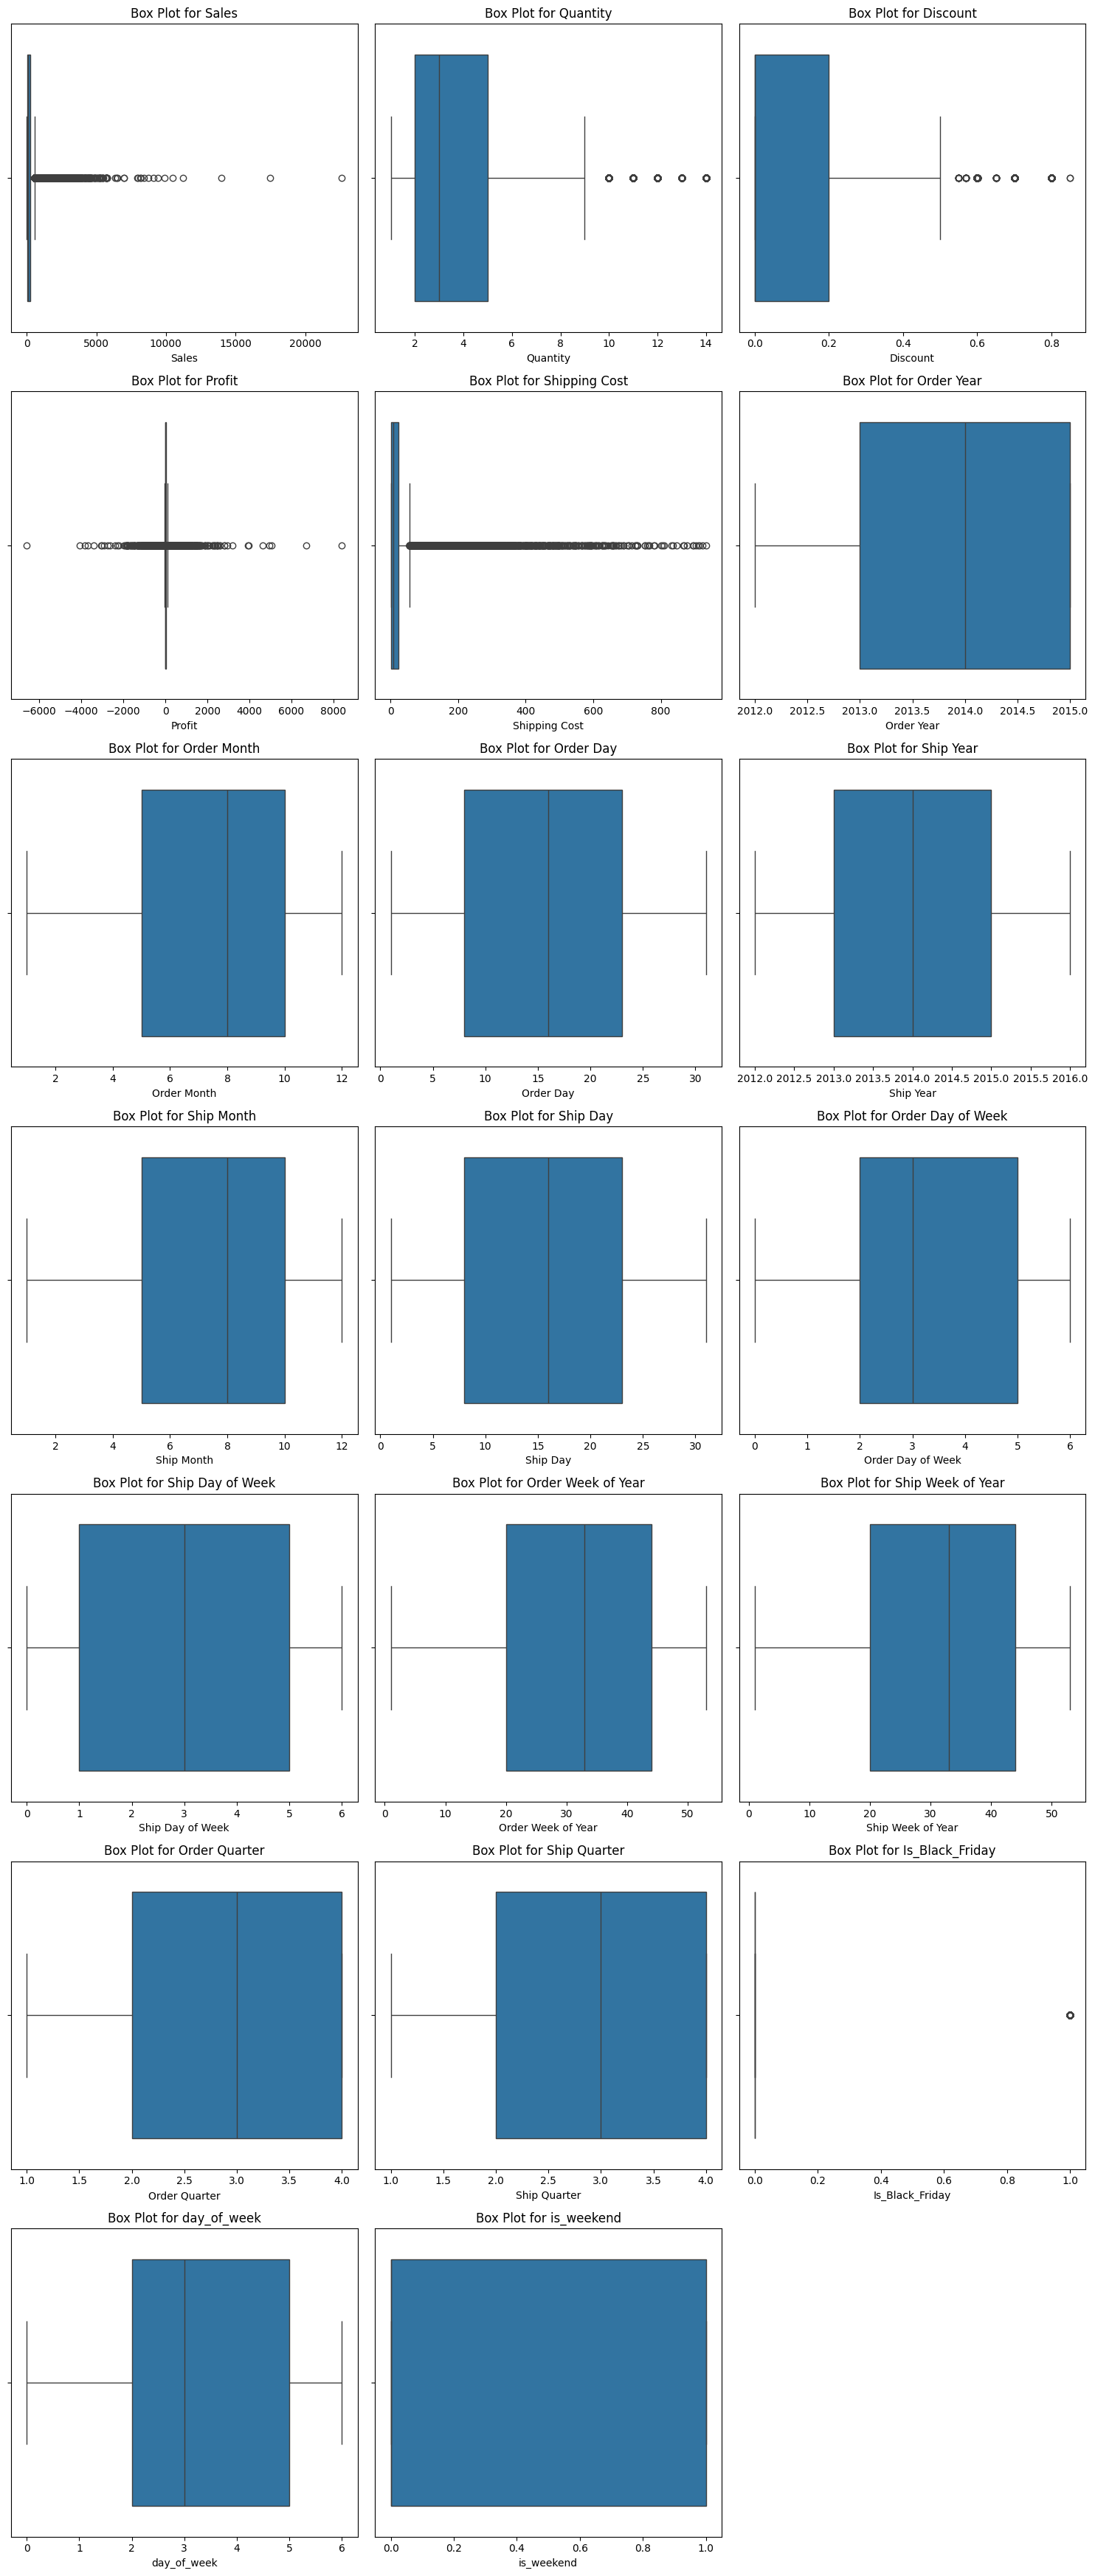

In [57]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of columns in the grid
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Calculate rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# box plot for every column
for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_num = i % num_cols
    ax = axes[row, col_num] if num_rows > 1 else axes[col_num]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Box Plot for {col}')

# Remove empty subplots if any
for j in range(len(numerical_cols), num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [58]:
columns_to_filter = ['Sales', 'Quantity','Discount','Profit', 'Shipping Cost']

for col in columns_to_filter:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Original shape: {data.shape}")
print(f"Shape after removing outliers: {df.shape}")

Original shape: (51290, 24)
Shape after removing outliers: (30879, 36)


# Statistics Data Analysis & visualization

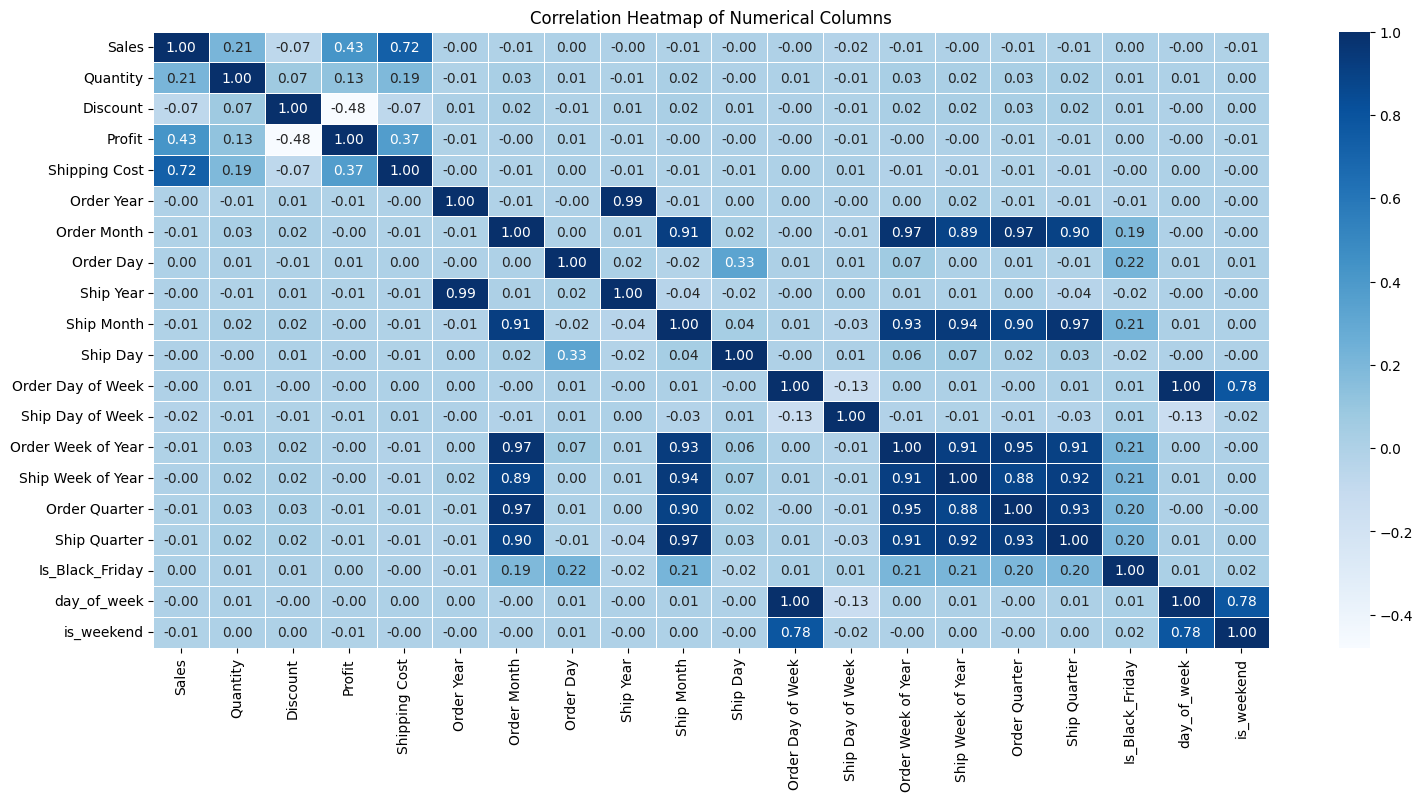

In [59]:
# Analysis of the correlation between numerical columns
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

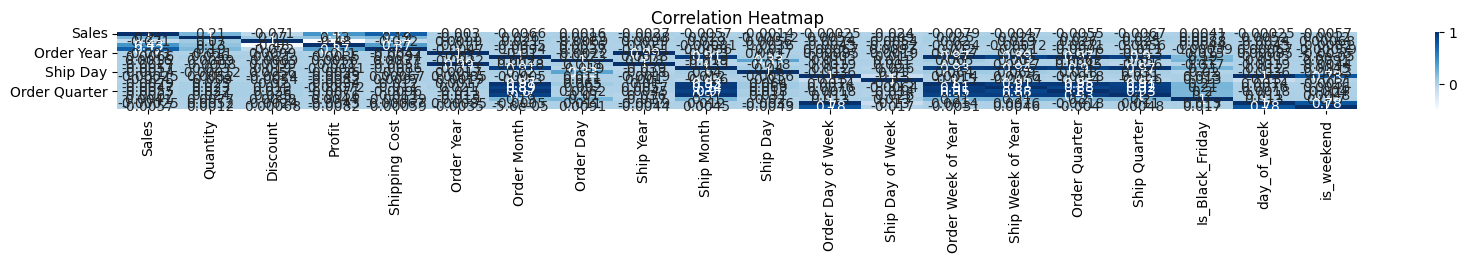

In [60]:
# Correlation Heatmap between numeric columns
plt.figure(figsize=(20, 1))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

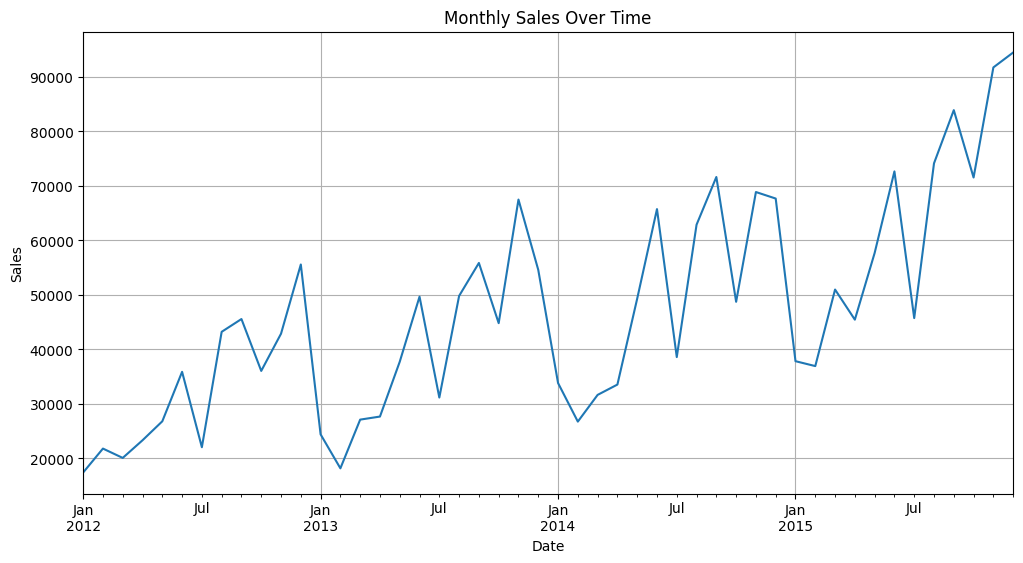

In [61]:
# <ine plot for sales over the time
df['Sales'].resample('M').sum().plot(figsize=(12,6))
plt.title("Monthly Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.grid(True)
plt.show()

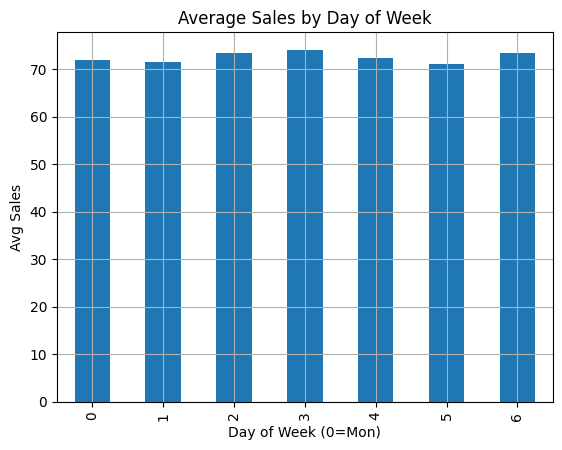

In [62]:
# sales depeding on every day a week
df['day_of_week'] = df.index.dayofweek  # 0=Monday, 6=Sunday
df.groupby('day_of_week')['Sales'].mean().plot(kind='bar')
plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Avg Sales")
plt.grid(True)
plt.show()

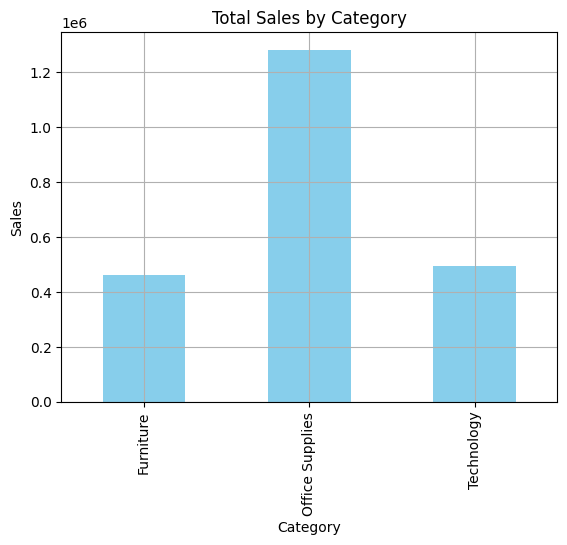

In [63]:
# sales based on category
df.groupby('Category')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

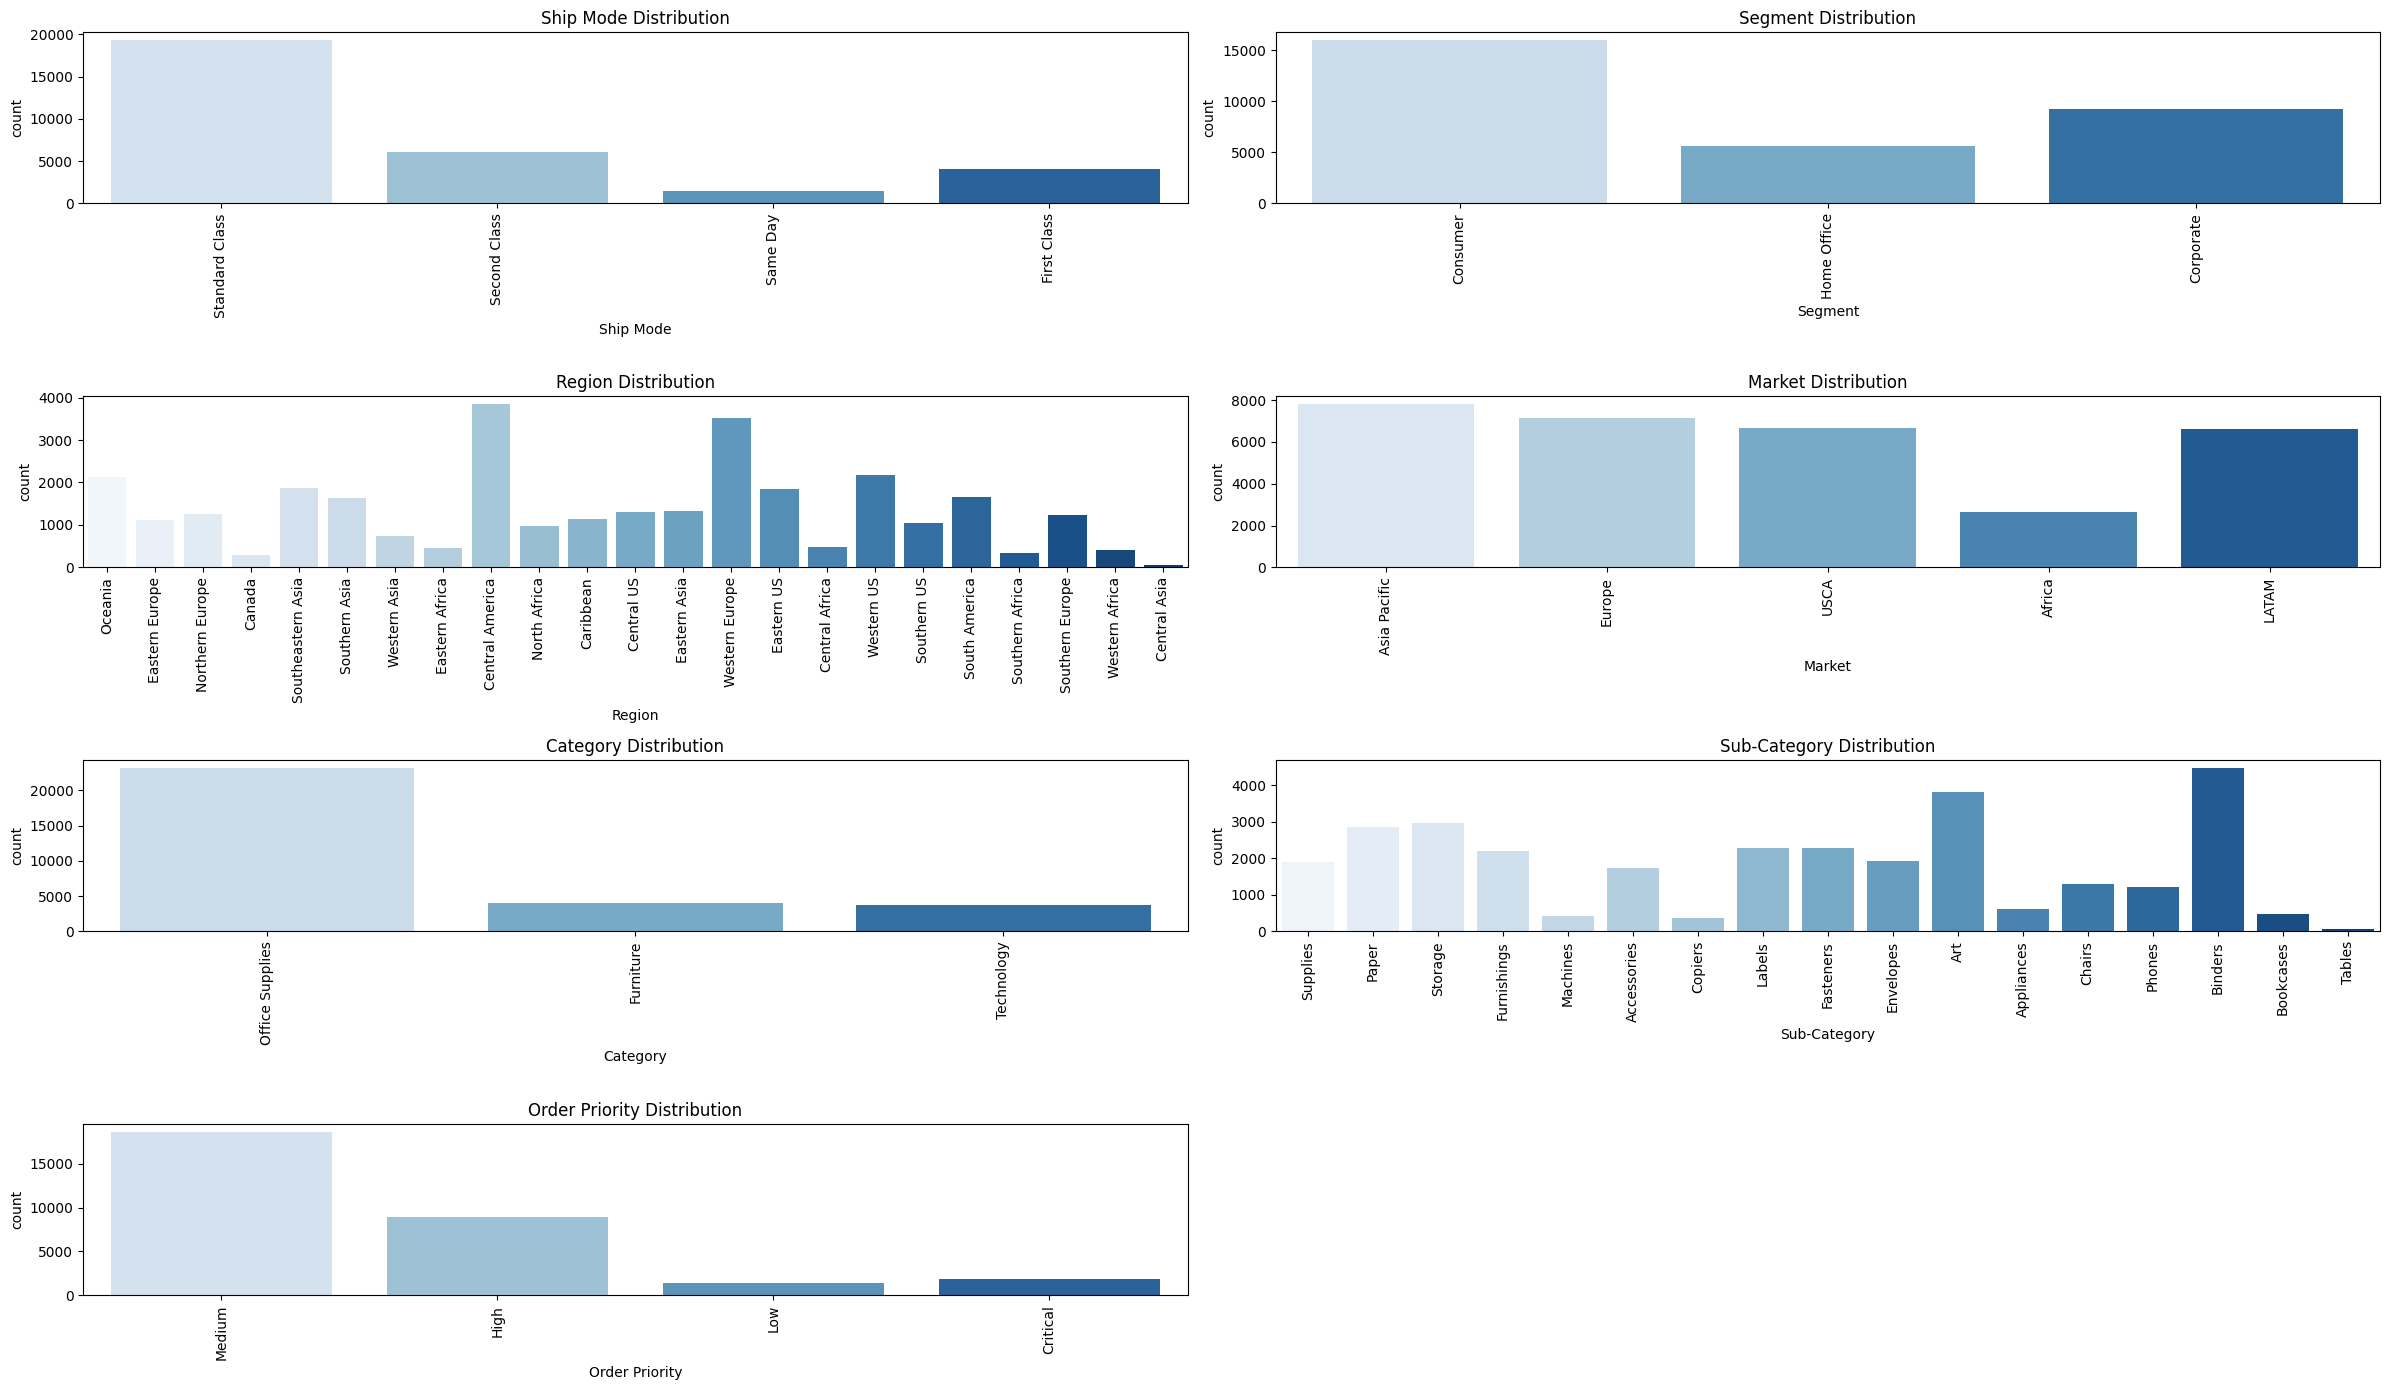

In [64]:
#To show the frequency distribution of the categorical columns
categorical_columns = ['Ship Mode', 'Segment', 'Region', 'Market', 'Category', 'Sub-Category', 'Order Priority']
plt.figure(figsize=(24, 14))
for i, column in enumerate(categorical_columns, 1):
	plt.subplot(4, 2, i)
	sns.countplot(x=column, data=df, palette='Blues')
	plt.title(f'{column} Distribution')
	plt.xticks(rotation=90)
	plt.tight_layout()
plt.show()

the relation between the negative profit with other columns

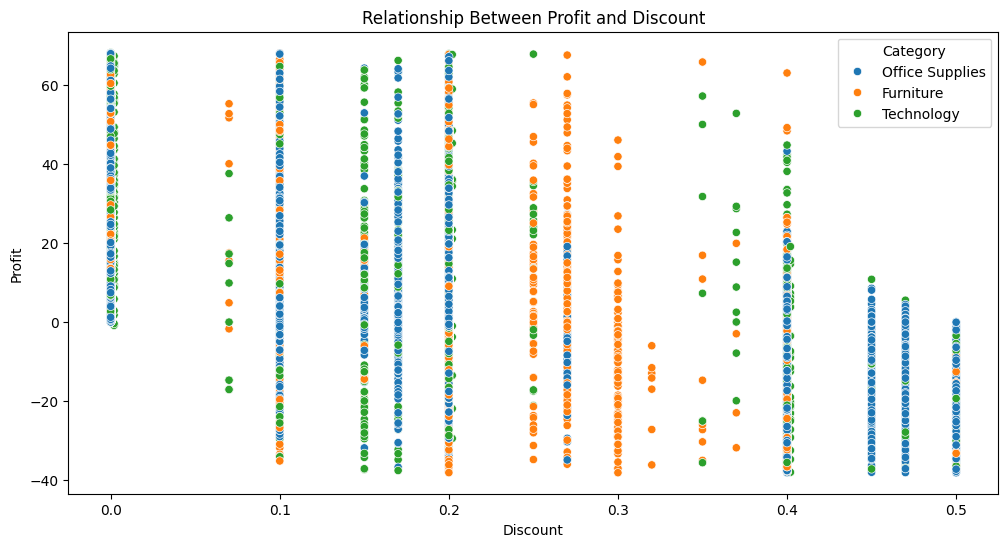

In [65]:
#rows with negative profit
negative_profit_rows = df[df['Profit'] < 0]

# the relation between profit and cost, discount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category')
plt.title('Relationship Between Profit and Discount')
plt.show()

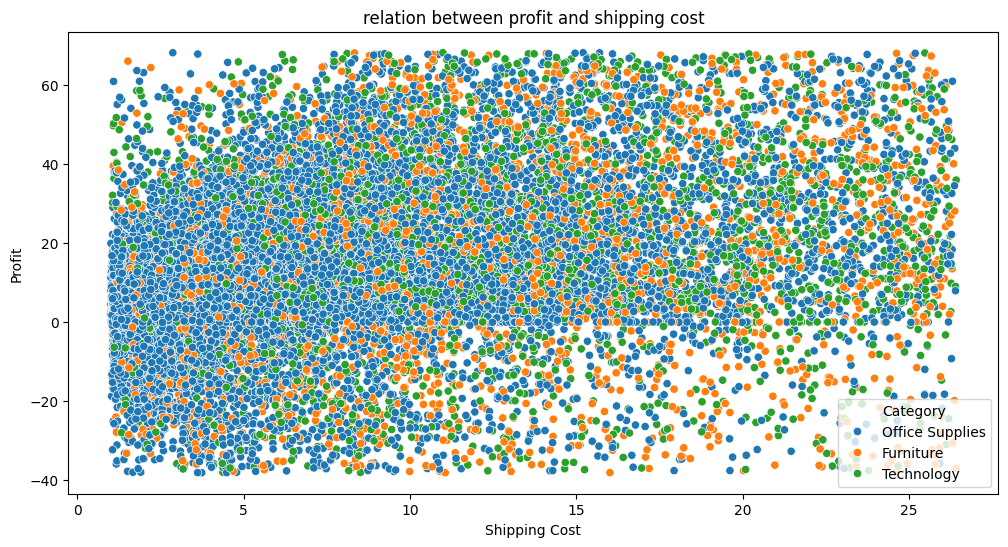

In [66]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Shipping Cost', y='Profit', data=df, hue='Category')
plt.title('relation between profit and shipping cost')
plt.show()

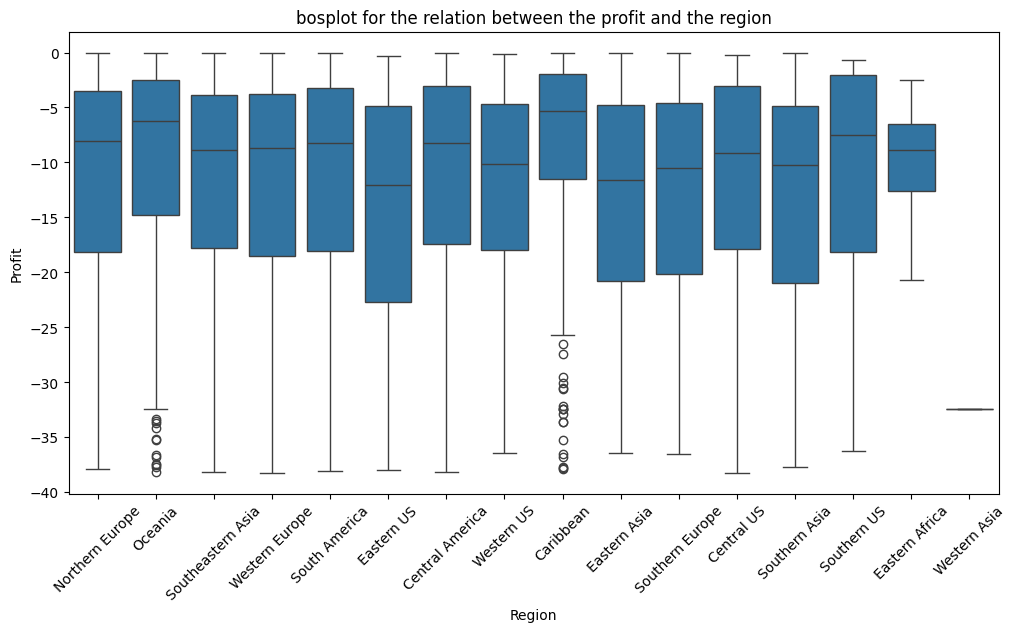

In [67]:
# Relationship Between Profit and Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Profit', data=negative_profit_rows)
plt.title('bosplot for the relation between the profit and the region')
plt.xticks(rotation=45)
plt.show()


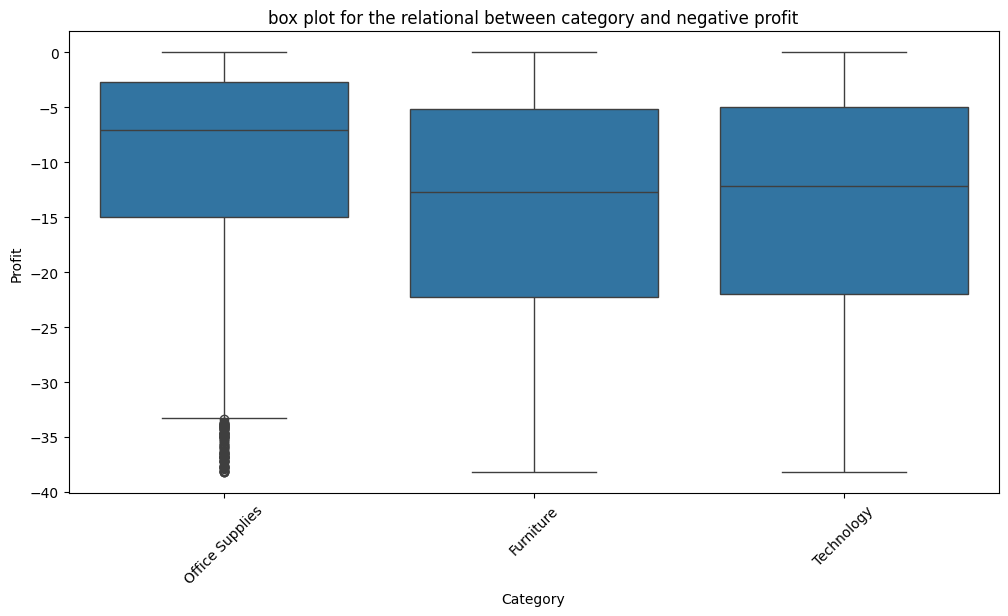

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Profit', data=negative_profit_rows)
plt.title('box plot for the relational between category and negative profit')
plt.xticks(rotation=45)
plt.show()


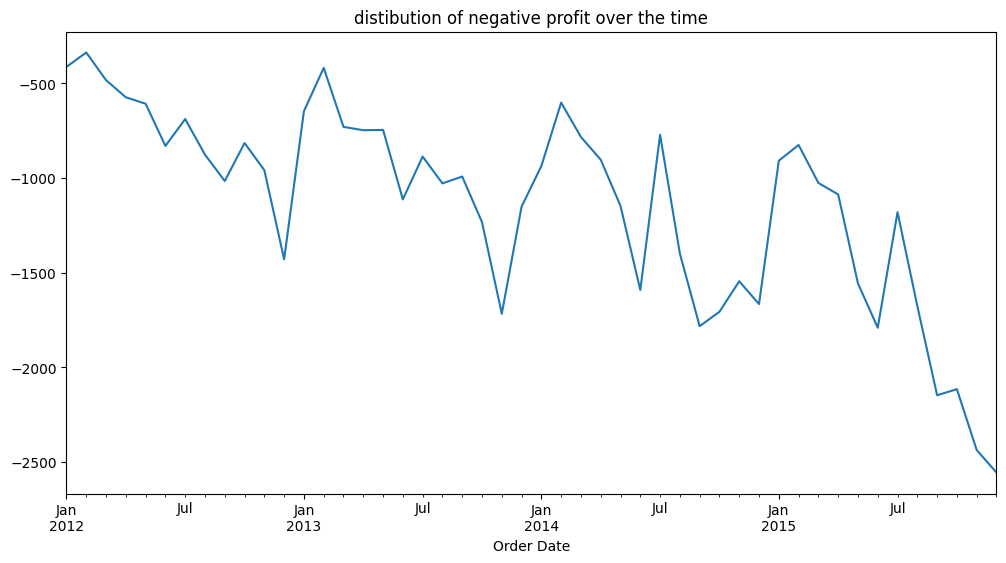

In [69]:
# negative profit over the time
plt.figure(figsize=(12, 6))
negative_profit_rows['Profit'].resample('M').sum().plot()
plt.title('distibution of negative profit over the time')
plt.show()

In [70]:
#statiscal analysis
print(negative_profit_rows.groupby('Category')['Profit'].describe())
print(negative_profit_rows.groupby('Region')['Profit'].describe())

                  count       mean        std      min       25%      50%  \
Category                                                                    
Furniture         868.0 -14.451664  10.713509 -38.2158 -22.23160 -12.6816   
Office Supplies  3247.0 -10.163778   9.434333 -38.2200 -14.98140  -7.0500   
Technology        639.0 -14.108171  10.519656 -38.1480 -21.99584 -12.1950   

                    75%     max  
Category                         
Furniture       -5.1180 -0.0009  
Office Supplies -2.7318 -0.0060  
Technology      -5.0070 -0.0120  
                    count       mean        std      min       25%       50%  \
Region                                                                         
Caribbean           257.0  -8.803252   9.349300 -37.9200 -11.52000  -5.31200   
Central America     802.0 -11.303553  10.038365 -38.2000 -17.39000  -8.24600   
Central US          138.0 -12.112824  10.289791 -38.2158 -17.87805  -9.14325   
Eastern Africa        4.0 -10.214250   7.655

In [71]:
#df.to_csv('global_superstore_2016_cleaned_data.csv', index=False)

#from google.colab import files
#files.download('global_superstore_2016_cleaned_data.csv')